In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
#outputdir = inputdir+'xsec_result_2D/' 
outputdir = inputdir+'xsec_result_2D_fullRun3/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_filesV4/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.18/04


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_weighted.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Cross section for single differnetial in Momentum (no sys)

In [4]:
# Load input files
pot_data =    2.144e+20
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_result_2D.root","RECREATE");


In [5]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 1.58205e+11  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [6]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [7]:
def draw_adding():
    prelim = ROOT.TLatex(0.95,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/23.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/23.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/20.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

def draw_adding_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .91,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/15.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [8]:
from array import array
#mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
#mom_bins = [ 0.00, 0.225, 0.28, 0.33, 0.39, 0.52, 0.78, 1.21, 2.5]

mom_bins = {}
mom_bins[0] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[1] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[2] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[3] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[4] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[5] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[6] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[7] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[8] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]

theta_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]

len_theta = len(theta_bins) - 1
len_mom = {}
sum_bins = 0
for i in range(len_theta):
    len_mom[i] = len(mom_bins[i]) - 1
    #print len_mom[i]
    sum_bins+=len_mom[i]

In [9]:
path_cv = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
#f_cv = ROOT.TFile.Open(path_cv+"xsec_filesV4/xsec_2D_wighted.root", 'read')
f_cv = ROOT.TFile.Open(path_cv+"xsec_filesV4/xsec_2D_Run3_wighted.root", 'read')


In [10]:
# get data, ext and dirt from CV file
h_xsec_data = []
h_xsec_signal = []
h_xsec_true = []
h_xsec_true_smeare = []
h_xsec_QE = []
h_xsec_MEC = []
h_xsec_RES = []
h_xsec_DIS = []


for t_bin in range(len_theta):
    h_xsec_data.append(f_cv.Get('h_xsec_data['+str(t_bin)+']'))
    h_xsec_signal.append(f_cv.Get('h_xsec_signal['+str(t_bin)+']'))
    h_xsec_true.append(f_cv.Get('h_xsec_true['+str(t_bin)+']'))
    h_xsec_true_smeare.append(f_cv.Get('h_xsec_true_smeare['+str(t_bin)+']'))
    h_xsec_QE.append(f_cv.Get('h_QE['+str(t_bin)+']'))
    h_xsec_MEC.append(f_cv.Get('h_MEC['+str(t_bin)+']'))
    h_xsec_RES.append(f_cv.Get('h_RES['+str(t_bin)+']'))
    h_xsec_DIS.append(f_cv.Get('h_DIS['+str(t_bin)+']'))

h_true_reco = f_cv.Get('h_true_reco')
h_smearing = f_cv.Get('h_smearing')
#h_xsec_data.Draw()
#c1.Draw()

In [11]:

smearing_matrix = ROOT.TH2F("smearing_matrix",'smearing_h',sum_bins+1,0,sum_bins+1,sum_bins+1,0,sum_bins+1)
for i in range(sum_bins+1):
    for j in range(sum_bins+1):
        smearing_matrix.SetBinContent(i+1,j+1,h_smearing.GetBinContent(j+1,i+1))

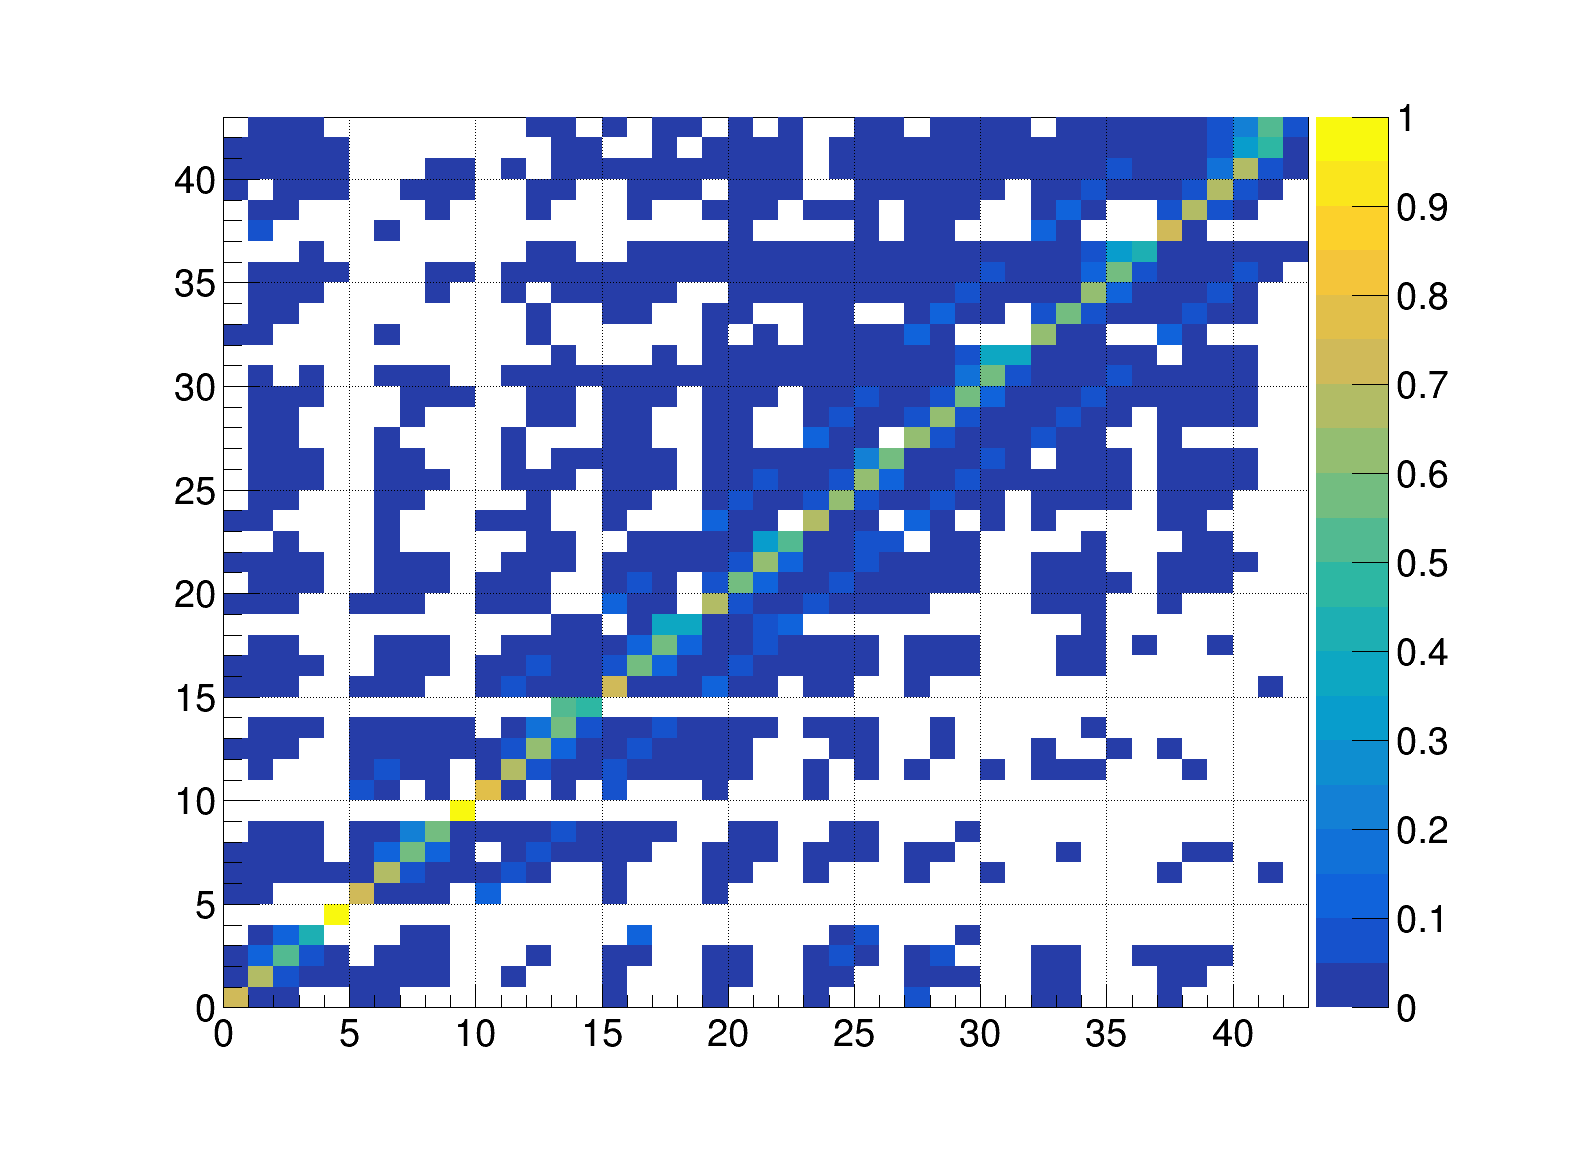

In [12]:
smearing_matrix.Draw('colz')
smearing_matrix.SetBinContent(5,5,1)
smearing_matrix.SetBinContent(10,10,1)
c1.Draw()

In [13]:
# Get all covariance matrizes from all the systematic uncertainties

#path_all = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
f_all_genie = ROOT.TFile.Open(path_cv+"xsec_all_2D_2_mar18/All_systematic_2D.root", 'read')
h_covariance_all_genie = f_all_genie.Get('h_covariance')

#path_genie_other = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_genie_other_mar18/'
f_genie_other = ROOT.TFile.Open(path_cv+"xsec_other_2D_2_mar18/Other_systematic_2D.root", 'read')
h_covariance_other_genie = f_genie_other.Get('h_covariance')

#path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_all/'
f_detsys = ROOT.TFile.Open(path_cv+"xsec_detsys_all_2D/Detector_systematic_2D.root", 'read')
h_covariance_detsys = f_detsys.Get('h_covariance')

#path_flux = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted/Flux/output/'
f_flux = ROOT.TFile.Open(path_cv+"xsec_flux_2D_2_mar18/Flux_systematic_2D.root", 'read')
h_covariance_flux = f_flux.Get('h_covariance')

#path_crt = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/'
#f_crt = ROOT.TFile.Open(path_crt+"xsec_crtsys_momentum.root", 'read')
#path_crt = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted/xsec_crt_sys_2/'
f_crt = ROOT.TFile.Open(path_cv+"xsec_crt_2D_mar18/CRT_systematic_2D.root", 'read')
h_covariance_crt = f_crt.Get('h_covariance')

#path_dirt = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted/xsec_wo_dirt/'
f_dirt = ROOT.TFile.Open(path_cv+"xsec_crt_2D_mar18/Dirt_systematic_2D.root", 'read')
h_covariance_dirt = f_dirt.Get('h_covariance')

#path_G4 = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_G4/'
#f_G4 = ROOT.TFile.Open(path_cv+"G4_systematic_combine.root", 'read')
#h_covariance_G4 = f_G4.Get('h_covariance')


h_covariance_tot = h_covariance_all_genie.Clone()
h_covariance_tot.Add(h_covariance_other_genie)
h_covariance_tot.Add(h_covariance_detsys)
h_covariance_tot.Add(h_covariance_flux)
h_covariance_tot.Add(h_covariance_crt)
h_covariance_tot.Add(h_covariance_dirt)
#h_covariance_tot.Add(h_covariance_G4)



True

In [14]:
#h_xsec_data
h_cov_stat = h_covariance_tot.Clone()

for i in range(sum_bins):
    for j in range(sum_bins):
        h_cov_stat.SetBinContent(i,j,0.0)
bin_counter = 0
for t_bin in range(len_theta):
    #print 'next theta',t_bin
    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        #print h_xsec_data[t_bin].GetBinError(m_bin+1)
        h_cov_stat.SetBinContent(bin_counter,bin_counter,h_xsec_data[t_bin].GetBinError(m_bin+1)*h_xsec_data[t_bin].GetBinError(m_bin+1))

        
        
h_cov_POT = h_covariance_tot.Clone()
for i in range(sum_bins):
    for j in range(sum_bins):
        h_cov_POT.SetBinContent(i,j,0.0)
        
bin_counter1 = 0
bin_counter2 = 0
for t_bin in range(len_theta):
    #print 'next theta',t_bin
    for m_bin in range(len_mom[t_bin]):
        bin_counter1 +=1
        bin_counter2 = 0
        for t_bin2 in range(len_theta):
            #print 'next theta',t_bin
            for m_bin2 in range(len_mom[t_bin2]):
                bin_counter2 +=1
                #print bin_counter1,bin_counter2,h_xsec_data[t_bin].GetBinContent(m_bin+1)*h_xsec_data[t_bin2].GetBinContent(m_bin2+1)*0.02*0.02
                h_cov_POT.SetBinContent(bin_counter1,bin_counter2,h_xsec_data[t_bin].GetBinContent(m_bin+1)*h_xsec_data[t_bin2].GetBinContent(m_bin2+1)*0.02*0.02)        
        #else:
        #    h_cov_POT.SetBinContent(i,j,0.0)
        #h_cov_POT.SetBinContent(i,j,h_xsec_data.GetBinContent(i)*h_xsec_data.GetBinContent(j)*0.02*0.02*1e-76)

In [15]:
h_covariance_tot.Add(h_cov_stat)
h_covariance_tot.Add(h_cov_POT)


True

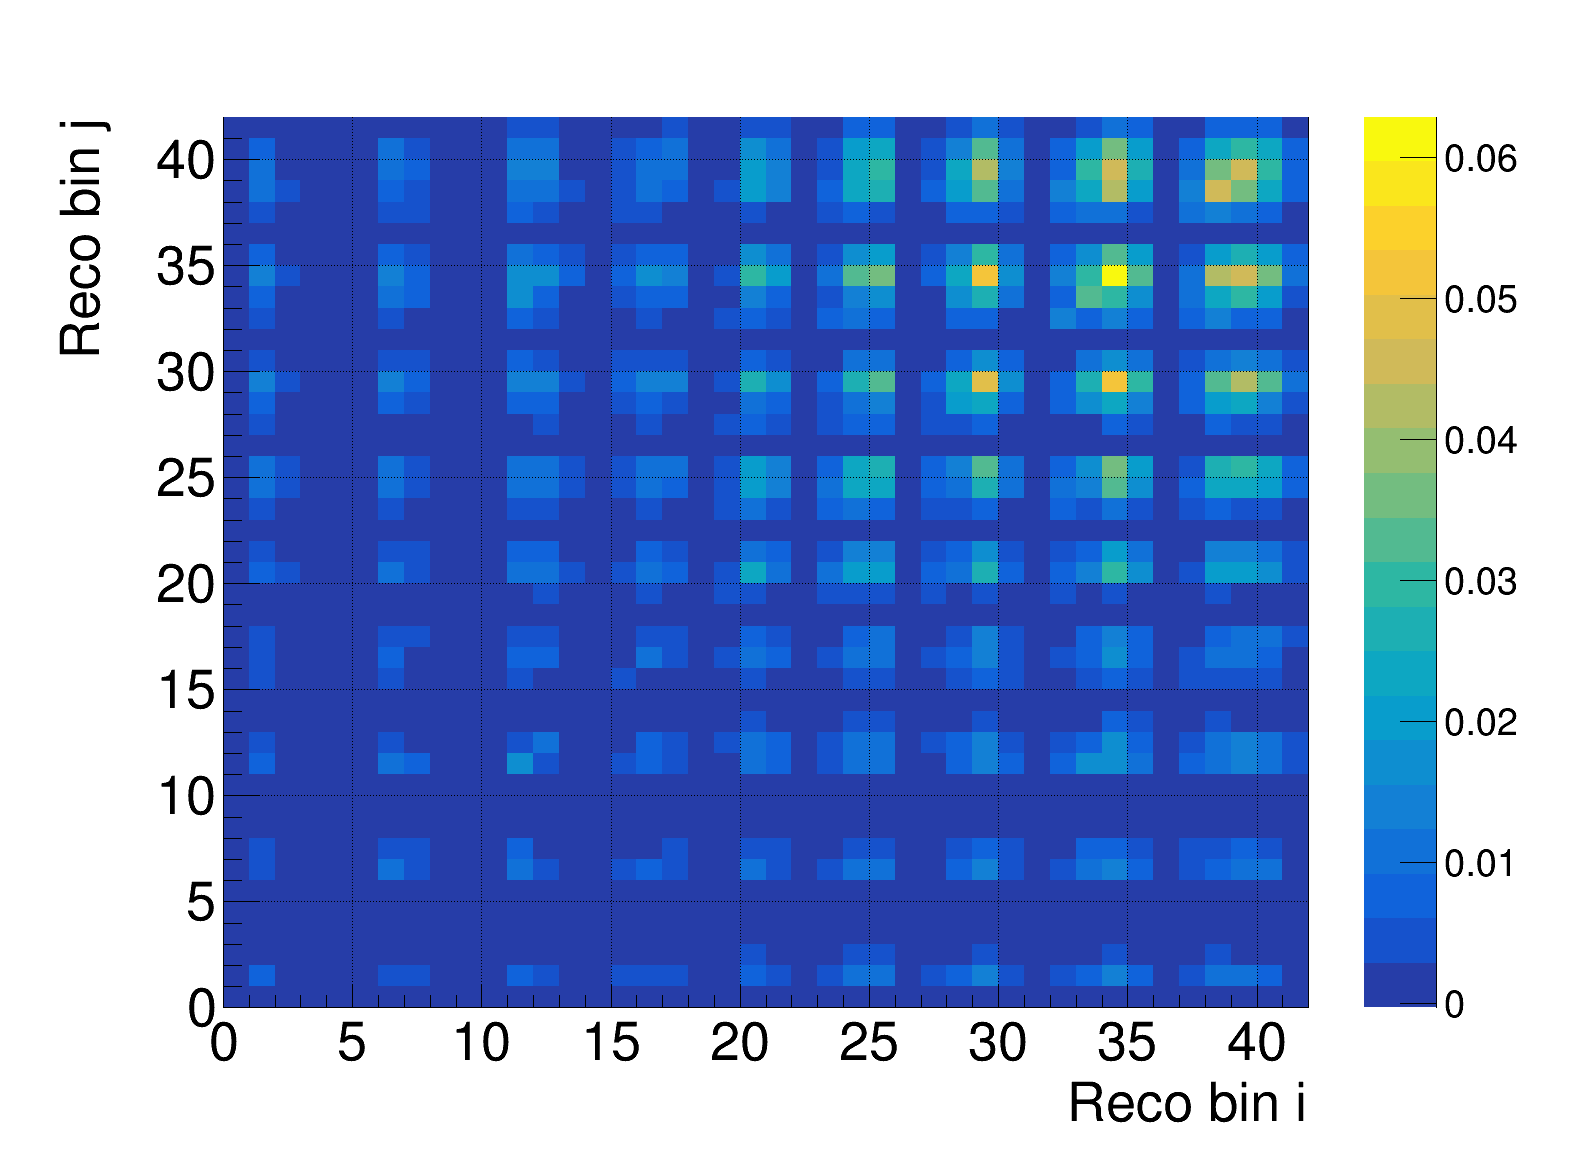

In [16]:

test = h_covariance_tot.Clone()
#test.Scale(1e76)

#test = f_flux.Get('h_frac_covariance')
test.Draw('colz')
#test.Draw('Text same')
c1.Draw()

In [17]:
cov_matrix = np.zeros((sum_bins,sum_bins))
for i in range(sum_bins):
    for j in range(sum_bins):
        cov_matrix[i][j]=h_covariance_tot.GetBinContent(i+1,j+1)

print cov_matrix[9][9]
cov_matrix[4][4] = 1e-80
cov_matrix[9][9] = 1e-80


0.0


In [18]:
xsec_diff = np.zeros((sum_bins))
bin_counter = 0
for t_bin in range(len_theta):
    for m_bin in range(len_mom[t_bin]):
        xsec_diff[bin_counter] = (h_xsec_data[t_bin].GetBinContent(m_bin+1) - h_xsec_signal[t_bin].GetBinContent(m_bin+1) )#*1e-38
        bin_counter+=1
cov_matrix_inv = np.linalg.inv(cov_matrix)

#print xsec_diffh_covariance_tot
#print np.transpose(xsec_diff)

chi2 = np.dot(xsec_diff,cov_matrix_inv)
chi2 = np.dot(chi2,xsec_diff)
print chi2
print chi2/42

1526.0207115707954
36.33382646597132


In [19]:
print xsec_diff#*1e38

[ 2.81232968e-03 -8.91792774e-03 -3.92418355e-03  1.27791520e-03
  0.00000000e+00 -1.51710063e-02  1.06956035e-01  3.87389362e-02
 -4.10480425e-03  0.00000000e+00 -3.64738777e-02  6.85373545e-02
  1.57247841e-01  3.13602388e-03  8.52807425e-05  4.39333916e-03
  1.70406818e-01  3.31797600e-02 -9.29572200e-03 -7.94931650e-02
  2.74271309e-01  9.20876861e-02 -1.88494064e-02 -4.45745140e-02
  1.22678280e-01  3.38971496e-01 -4.23063114e-02 -4.18960899e-02
  1.56936049e-01  3.55858803e-01 -1.10037744e-01 -3.93791161e-02
 -7.91570693e-02  6.68011904e-02  4.01142478e-01  5.08801937e-02
 -1.04370128e-01 -1.06077157e-01 -4.01617289e-02  1.88663244e-01
  5.94784021e-02 -1.34509131e-01]


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_covar.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/root/h_xsec_covar.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_covar.pdf has been created


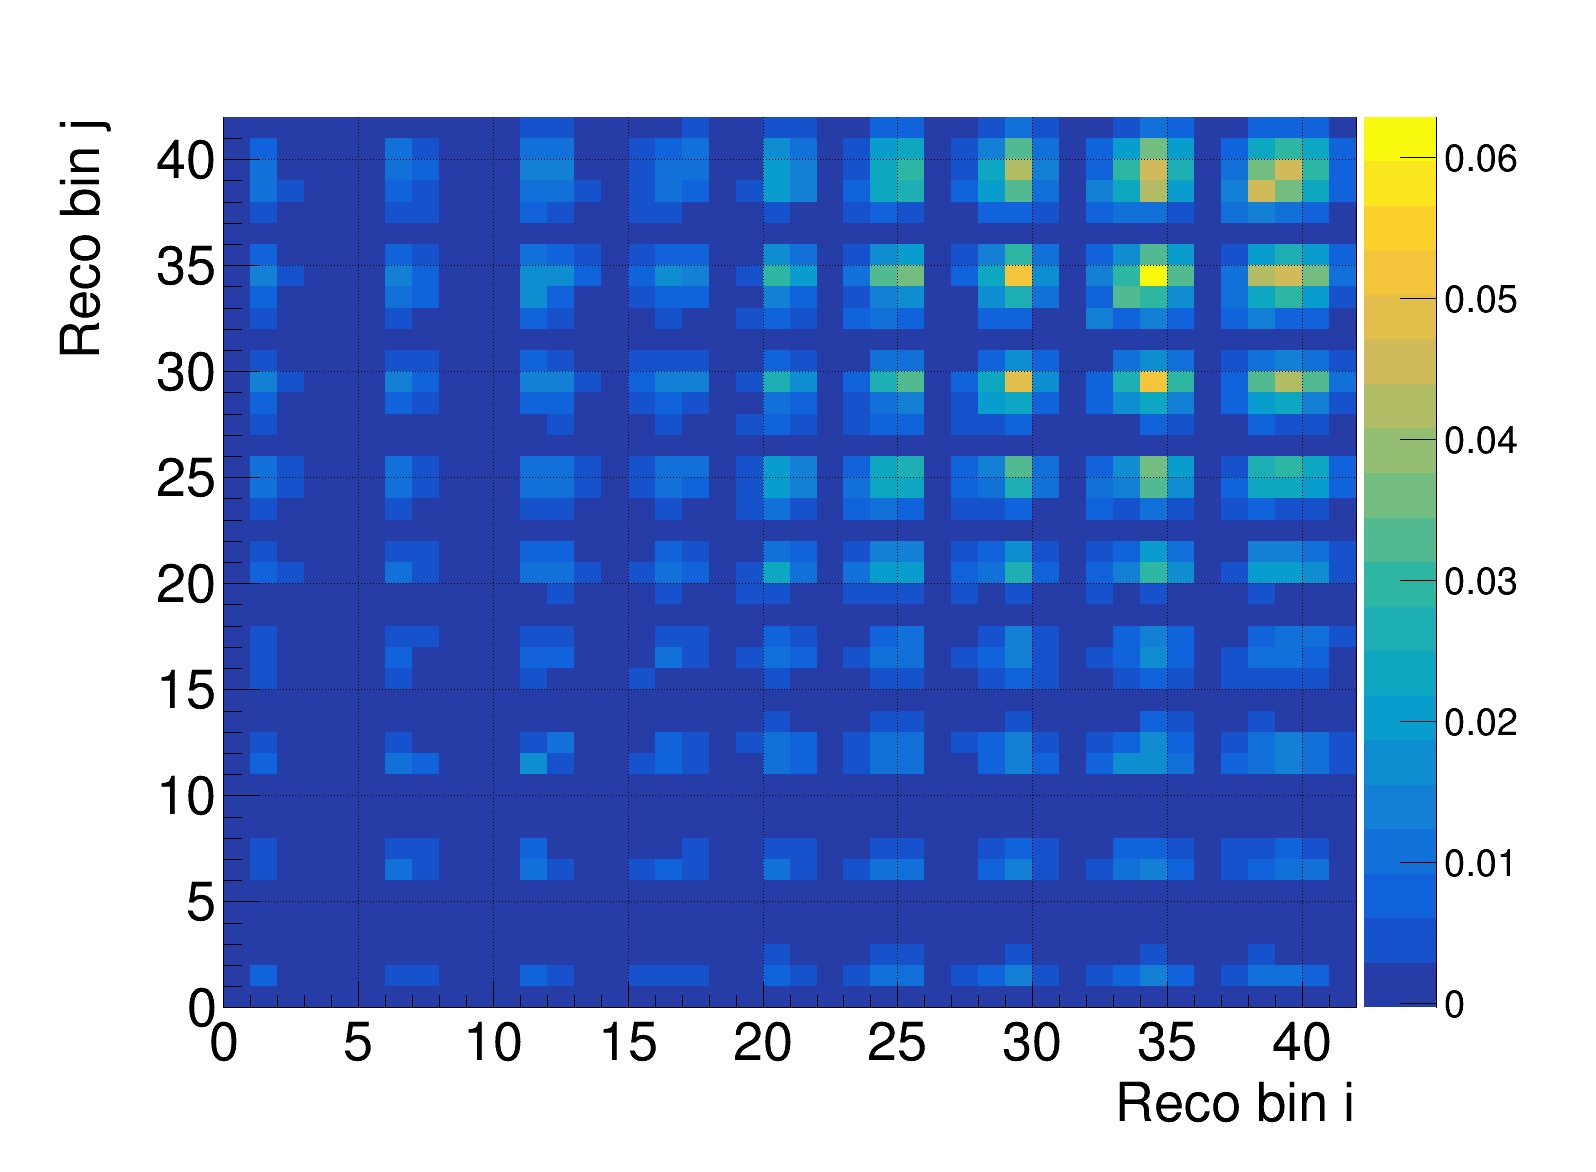

In [20]:
test = h_covariance_tot.Clone()
#test.Scale(1e76)

#test = f_flux.Get('h_frac_covariance')
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.15)
ROOT.gStyle.SetPaintTextFormat('0.5g')

test.Draw('colz')
#test.Draw('Text same')
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_covar.png")
c1.SaveAs(outputdir_root + "h_xsec_covar.root")
c1.SaveAs(outputdir_pdf + "h_xsec_covar.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_frac_covar.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/root/h_xsec_frac_covar.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_frac_covar.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_sqrt_frac_covar.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/root/h_xsec_sqrt_frac_covar.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_

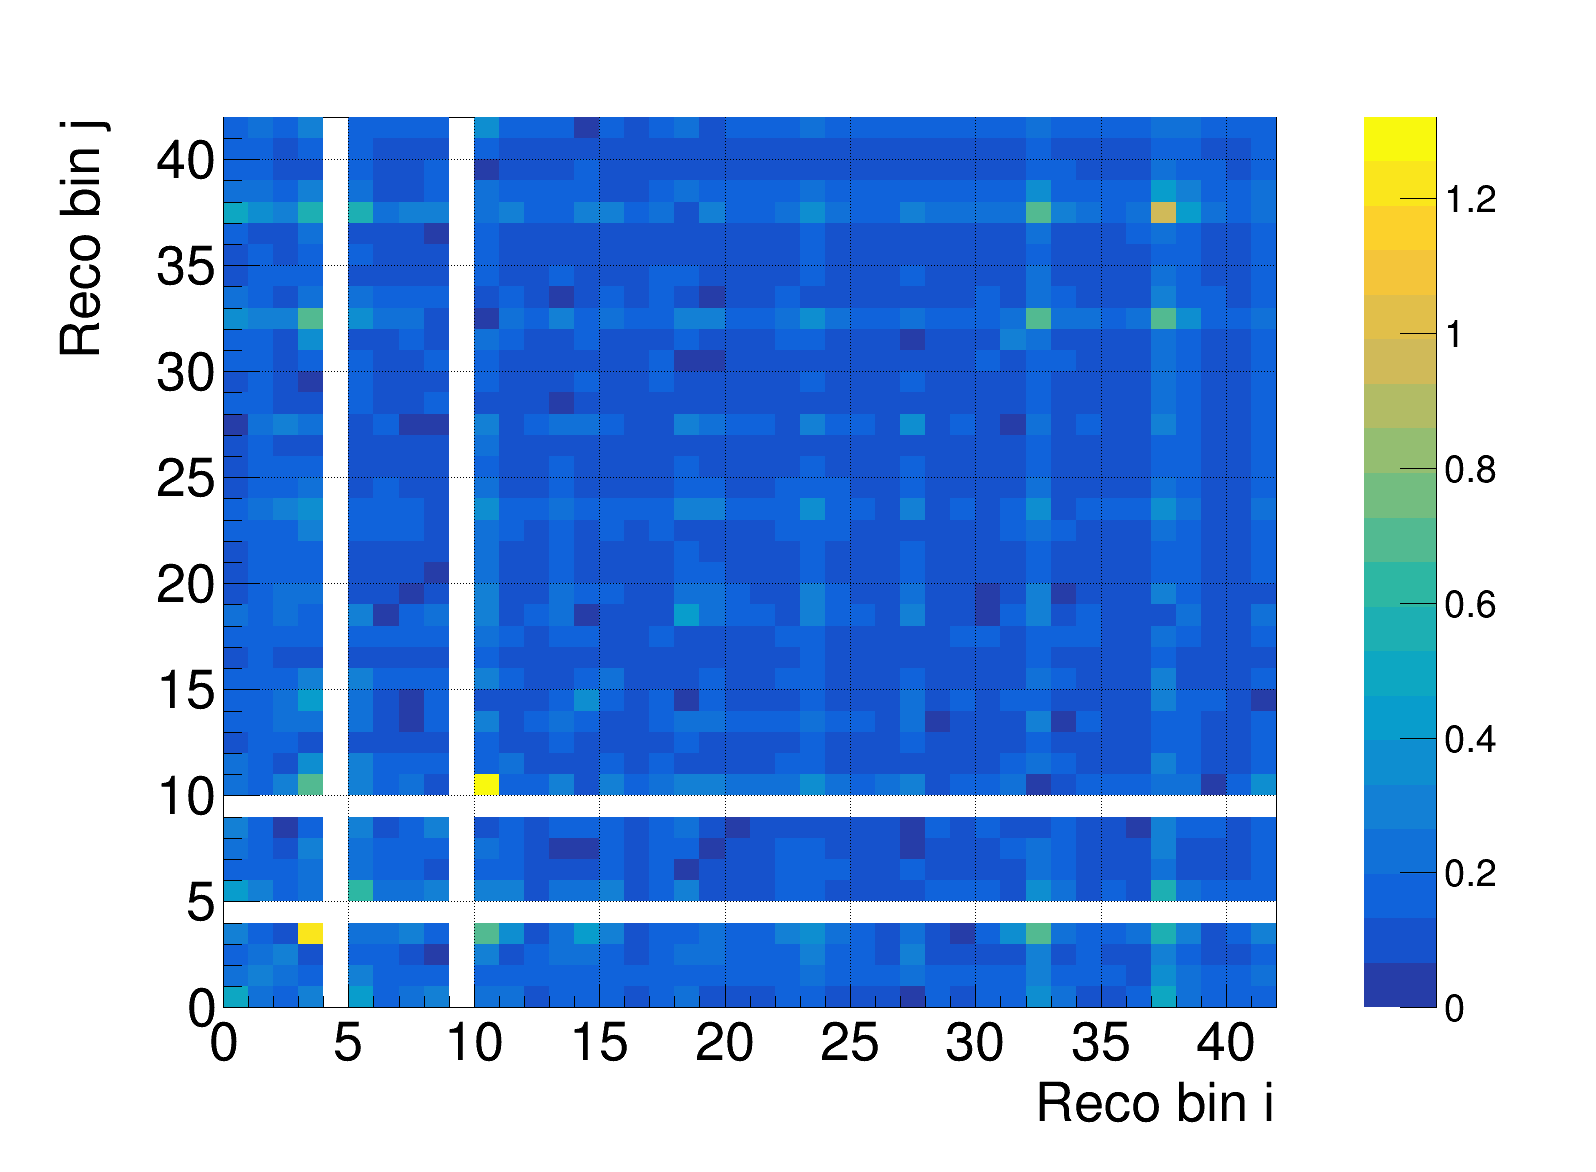

In [21]:
test = h_covariance_tot.Clone()
#test.Scale(1e76)
bin_counter1 = 0
for t_bin in range(len_theta):
    #print 'next theta',t_bin
    for m_bin in range(len_mom[t_bin]):
        bin_counter1 +=1
        bin_counter2 = 0
        for t_bin2 in range(len_theta):
            #print 'next theta',t_bin
            for m_bin2 in range(len_mom[t_bin2]):
                bin_counter2 +=1
                test.SetBinContent(bin_counter1,bin_counter2,(h_covariance_tot.GetBinContent(bin_counter1,bin_counter2))/(1e-80+h_xsec_data[t_bin].GetBinContent(m_bin+1)*h_xsec_data[t_bin2].GetBinContent(m_bin2+1)))

                
#test = f_flux.Get('h_frac_covariance')
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')

test.Draw('colz')
#test.Draw('Text same')
c1.SetRightMargin(0.2)
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_frac_covar.png")
c1.SaveAs(outputdir_root + "h_xsec_frac_covar.root")
c1.SaveAs(outputdir_pdf + "h_xsec_frac_covar.pdf")

test = h_covariance_tot.Clone()
#test.Scale(1e76)
bin_counter1 = 0
for t_bin in range(len_theta):
    #print 'next theta',t_bin
    for m_bin in range(len_mom[t_bin]):
        bin_counter1 +=1
        bin_counter2 = 0
        for t_bin2 in range(len_theta):
            #print 'next theta',t_bin
            for m_bin2 in range(len_mom[t_bin2]):
                bin_counter2 +=1
                #print bin_counter1,bin_counter2,(h_covariance_tot.GetBinContent(bin_counter1,bin_counter2)/(1e-80+h_xsec_data[t_bin].GetBinContent(m_bin+1)*h_xsec_data[t_bin2].GetBinContent(m_bin2+1)))
                #print bin_counter1,bin_counter2, h_covariance_tot.GetBinContent(bin_counter1,bin_counter2),1e-80+h_xsec_data[t_bin].GetBinContent(m_bin+1),h_xsec_data[t_bin2].GetBinContent(m_bin2+1)
                test.SetBinContent(bin_counter1,bin_counter2,math.sqrt(abs(h_covariance_tot.GetBinContent(bin_counter1,bin_counter2))/(1e-80+h_xsec_data[t_bin].GetBinContent(m_bin+1)*h_xsec_data[t_bin2].GetBinContent(m_bin2+1))))

        #print h_covariance_tot.GetBinContent(i,j)/(h_xsec_data.GetBinContent(i)*h_xsec_data.GetBinContent(j))
        #print h_covariance_tot.GetBinContent(i,j), h_xsec_data.GetBinContent(i), h_xsec_data.GetBinContent(j)
#test = f_flux.Get('h_frac_covariance')
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')

test.Draw('colz')
#test.Draw('Text same')
c1.SetRightMargin(0.2)
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_sqrt_frac_covar.png")
c1.SaveAs(outputdir_root + "h_xsec_sqrt_frac_covar.root")
c1.SaveAs(outputdir_pdf + "h_xsec_sqrt_frac_covar.pdf")

Info in <TCanvas::Print>: png file h_xsec_correlation.png has been created
Info in <TCanvas::SaveAs>: ROOT file h_xsec_correlation.root has been created
Info in <TCanvas::Print>: pdf file h_xsec_correlation.pdf has been created


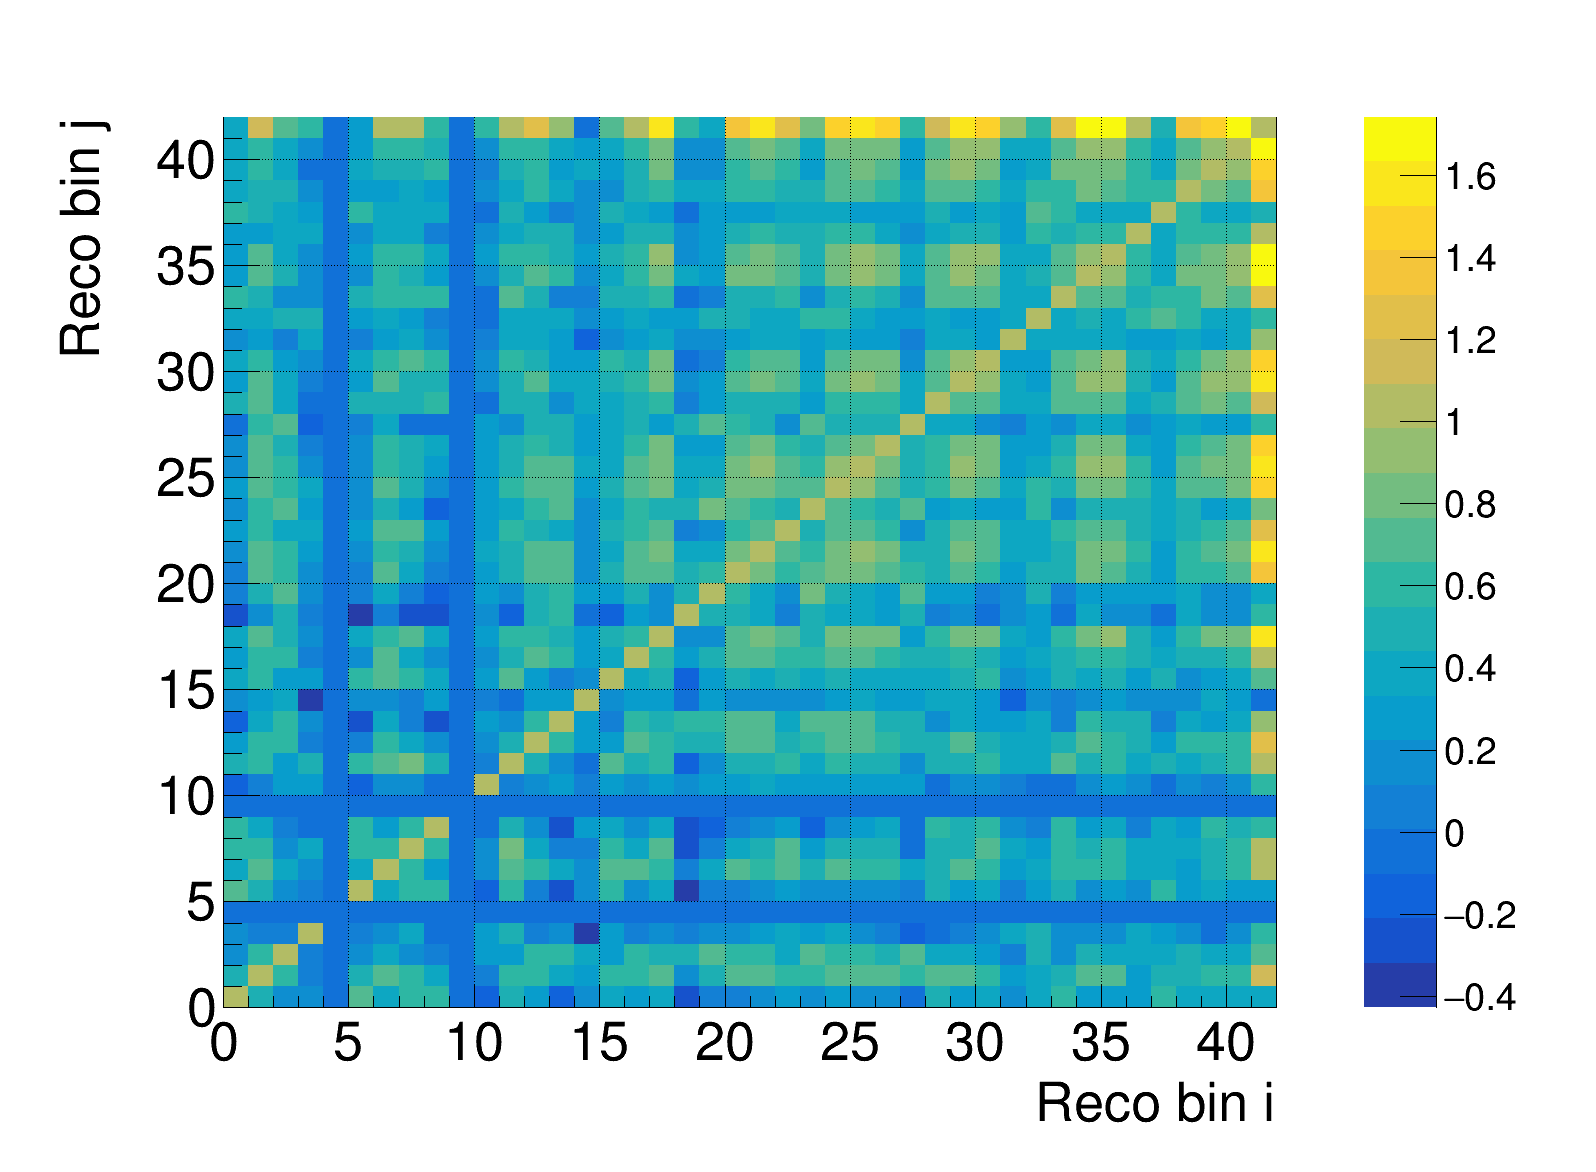

In [22]:
  
test = h_covariance_tot.Clone()
#test.Scale(1e76)
for i in range(1,sum_bins+1):
    for j in range(1,sum_bins+1):
        test.SetBinContent(i,j,h_covariance_tot.GetBinContent(i,j)/math.sqrt(1e-300+h_covariance_tot.GetBinContent(i,i)*h_covariance_tot.GetBinContent(j,j)))

ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')

test.Draw('colz')
#test.Draw('Text same')
c1.SetRightMargin(0.2)
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_correlation.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_correlation.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_correlation.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_corr_stat0.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_corr_stat0.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_corr_stat1.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_corr_stat1.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_corr_stat2.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_corr_stat2.pdf has

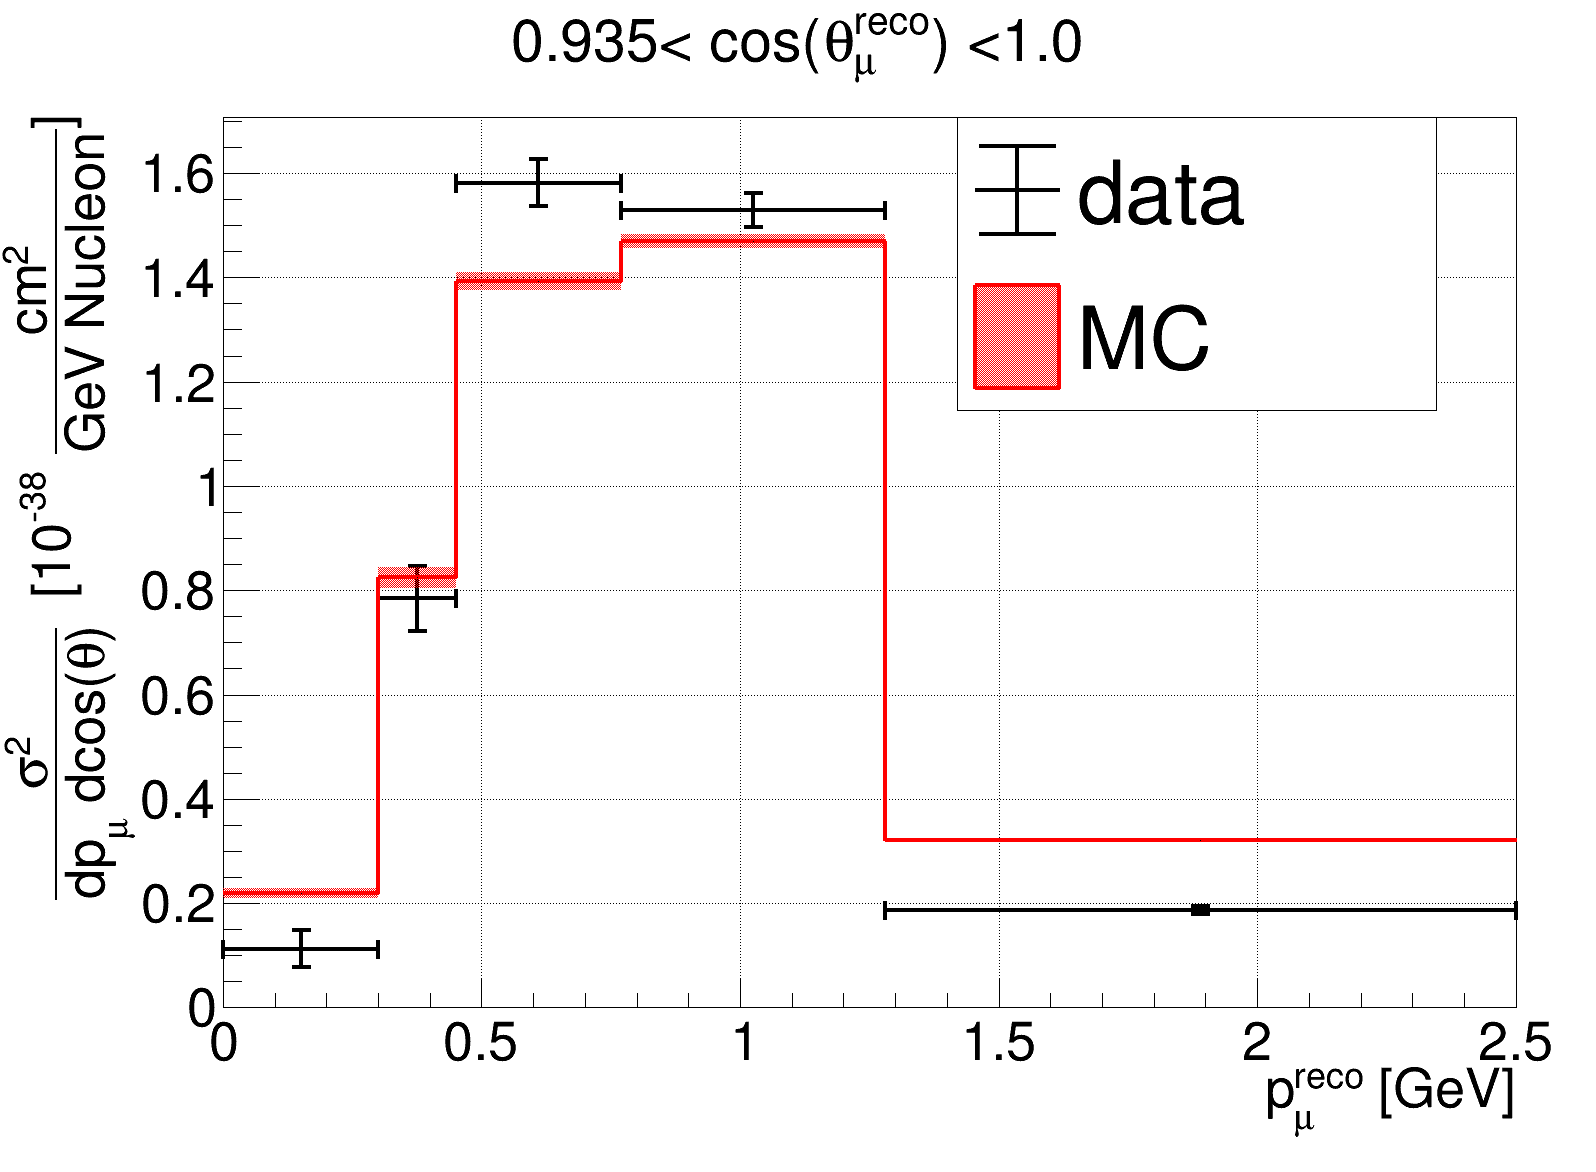

In [23]:
ROOT.gStyle.SetOptTitle(1)
bin_counter = 0
h_stat = []
for t_bin in range(len_theta): #len_theta
    legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
    h_xsec_signal[t_bin].SetLineColor(2)
    legend.AddEntry(h_xsec_data[t_bin],'data',"lep");
    legend.AddEntry(h_xsec_signal[t_bin],'MC',"f");
    
    h_xsec_data[t_bin].SetTitle(str(theta_bins[t_bin])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[t_bin+1]))

    h_xsec_data[t_bin].SetYTitle("#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]")
    h_xsec_data[t_bin].SetXTitle("p^{reco}_{#mu} [GeV]")
    h_xsec_data[t_bin].SetLineWidth(3)
    h_xsec_data[t_bin].SetMaximum(-1111)
    h_xsec_data[t_bin].SetMinimum(0)

    h_xsec_data[t_bin].GetYaxis().SetTitleSize(0.05)
    h_xsec_data[t_bin].GetYaxis().SetTitleOffset(0.0)
    h_xsec_data[t_bin].GetYaxis().SetLabelSize(0.05)
    h_xsec_data[t_bin].GetXaxis().SetTitleSize(0.05)
    h_xsec_data[t_bin].GetXaxis().SetLabelSize(0.05)
    h_xsec_data[t_bin].GetXaxis().SetTitleOffset(1)
    h_xsec_data[t_bin].SetLineColor(ROOT.kBlack)
    h_xsec_data[t_bin].SetLineWidth(4)
    ROOT.gStyle.SetEndErrorSize(9)
    c1.SetRightMargin(0.05)

    h_xsec_data[t_bin].Draw('E1')
    h_xsec_signal[t_bin].SetFillColor(0)
    h_xsec_signal[t_bin].SetLineWidth(4)
    #h_overlay_sig.Draw('hist same')
    h_xsec_signal[t_bin].DrawCopy('Hist same')
    h_xsec_signal[t_bin].SetFillColor(2)
    h_xsec_signal[t_bin].SetFillStyle(3001)
    h_xsec_signal[t_bin].Draw('E2 same')

    legend.Draw()
    #prelim, pot_tex = draw_adding()
    #prelim.Draw()
    #pot_tex.Draw()
    c1.Draw()
    c1.SaveAs(outputdir_png + 'h_xsec_corr_stat'+str(t_bin)+'.png')
    #c1.SaveAs(outputdir_root + 'h_xsec_corr_stat'+str(t_bin)+'.root')
    c1.SaveAs(outputdir_pdf + 'h_xsec_corr_stat'+str(t_bin)+'.pdf')

    h_stat.append(h_xsec_data[t_bin].Clone())

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_corr_allsys0.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_corr_allsys0.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_corr_allsys1.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_corr_allsys1.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_corr_allsys2.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_corr_all

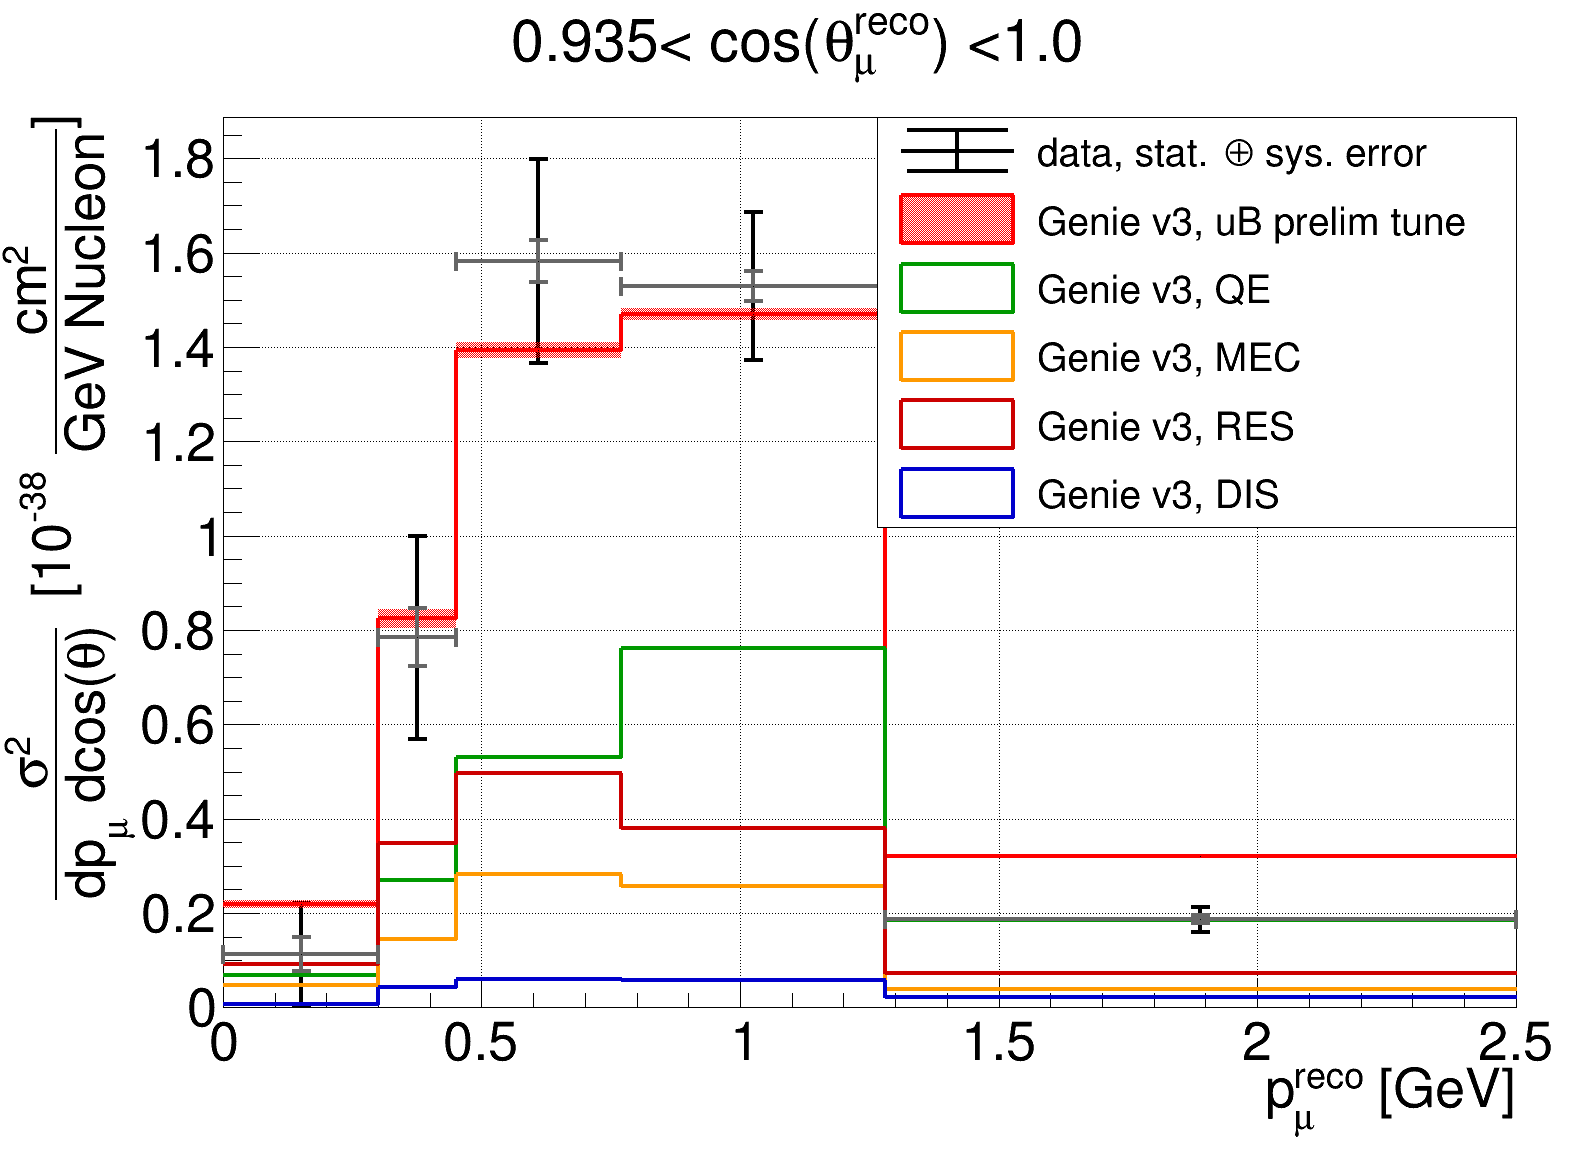

In [24]:
#all systematics
ROOT.gStyle.SetOptTitle(1)
bin_counter = 0
for t_bin in range(len_theta): #len_theta
    legend = ROOT.TLegend(0.55,0.55,0.95,0.9)
    h_xsec_signal[t_bin].SetLineColor(2)
    legend.AddEntry(h_xsec_data[t_bin],'data, stat. #oplus sys. error',"lep");
    legend.AddEntry(h_xsec_signal[t_bin],'Genie v3, uB prelim tune',"f");
    legend.AddEntry(h_xsec_QE[t_bin],'Genie v3, QE',"f");
    legend.AddEntry(h_xsec_MEC[t_bin],'Genie v3, MEC',"f");
    legend.AddEntry(h_xsec_RES[t_bin],'Genie v3, RES',"f");
    legend.AddEntry(h_xsec_DIS[t_bin],'Genie v3, DIS',"f");
    #legend.AddEntry(h_xsec_MC_noTune,'Genie v3',"f");
    c1.SetRightMargin(0.05)
    ROOT.gStyle.SetEndErrorSize(9)

    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_xsec_data[t_bin].SetBinError(m_bin+1,math.sqrt(h_covariance_tot.GetBinContent(bin_counter,bin_counter)))

    h_xsec_data[t_bin].SetLineWidth(4)
    h_xsec_data[t_bin].Draw('E1')
    h_xsec_signal[t_bin].SetFillColor(0)
    h_xsec_signal[t_bin].SetLineWidth(4)
    #h_overlay_sig.Draw('hist same')
    h_xsec_signal[t_bin].DrawCopy('Hist same')
    h_xsec_signal[t_bin].SetFillColor(2)
    h_xsec_signal[t_bin].SetFillStyle(3001)
    h_xsec_signal[t_bin].Draw('E2 same')
    
    h_xsec_QE[t_bin].Draw('same hist')
    h_xsec_MEC[t_bin].Draw('same hist')
    h_xsec_RES[t_bin].Draw('same hist')
    h_xsec_DIS[t_bin].Draw('same hist')

    h_stat[t_bin].SetLineColor(ROOT.kGray+2)
    h_stat[t_bin].Draw('E1 same')
    legend.Draw()
    #prelim, pot_tex = draw_adding()
    #prelim.Draw()
    #pot_tex.Draw()
    c1.Draw()
    c1.SaveAs(outputdir_png + 'h_xsec_corr_allsys'+str(t_bin)+'.png')
    #c1.SaveAs(outputdir_root + 'h_xsec_corr_allsys'+str(t_bin)+'.root')
    c1.SaveAs(outputdir_pdf + 'h_xsec_corr_allsys'+str(t_bin)+'.pdf')


In [25]:
xsec_data = ROOT.TH1F("xsec_data",'xsec_data matrix',sum_bins,0,sum_bins)
xsec_signal = ROOT.TH1F("xsec_signal",'xsec_signal matrix',sum_bins,0,sum_bins)

bin_counter = 0
for t_bin in range(len_theta): #len_theta
    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        xsec_data.SetBinContent(bin_counter,h_xsec_data[t_bin].GetBinContent(m_bin+1))
        xsec_data.SetBinError(bin_counter,h_xsec_data[t_bin].GetBinError(m_bin+1))
        xsec_signal.SetBinContent(bin_counter,h_xsec_signal[t_bin].GetBinContent(m_bin+1))
        xsec_signal.SetBinError(bin_counter,h_xsec_signal[t_bin].GetBinError(m_bin+1))
        
    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_ratio_sys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/root/h_xsec_ratio_sys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_ratio_sys.pdf has been created


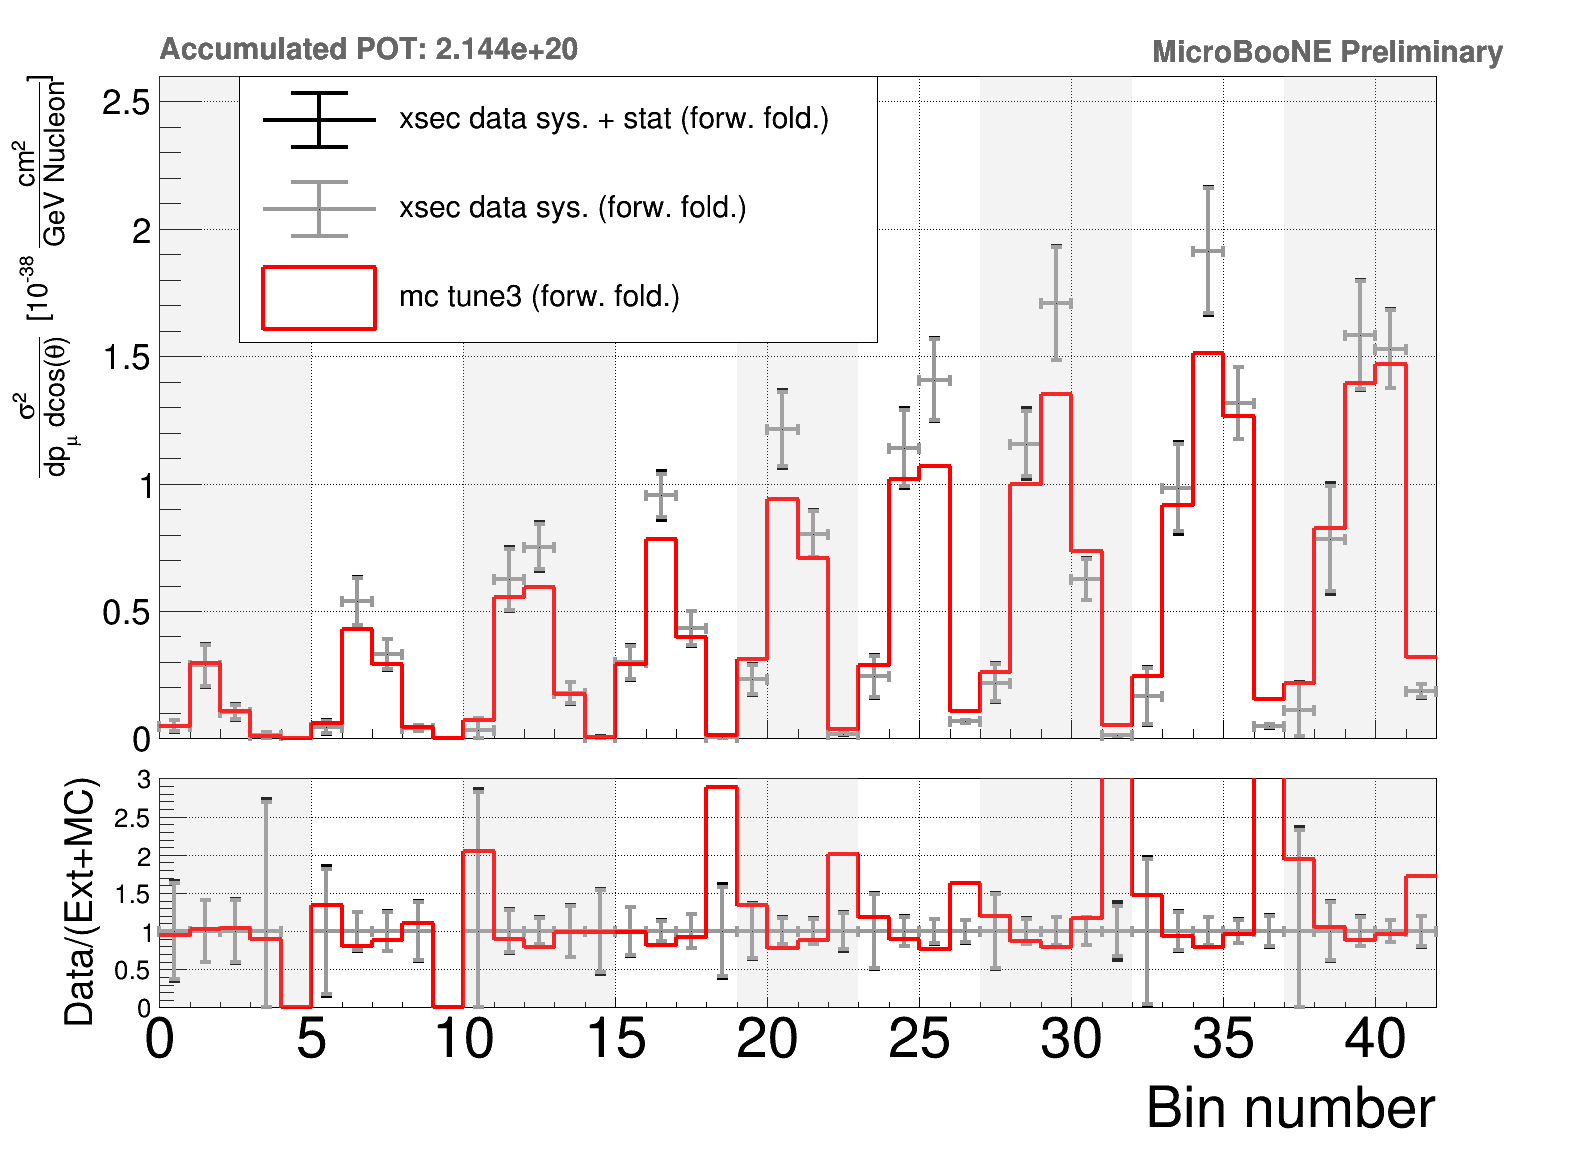

In [26]:
ROOT.gStyle.SetOptTitle(0)

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

xsec_data_this = xsec_data.Clone()
xsec_data_this.SetXTitle("Bin number")
xsec_data_this.SetYTitle('#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]')
    
xsec_data_this.GetYaxis().SetTitleSize(0.04)
xsec_data_this.GetYaxis().SetTitleOffset(0.0)
xsec_data_this.GetYaxis().SetLabelSize(0.05)
xsec_data_this.GetXaxis().SetTitleSize(0.05)
xsec_data_this.GetXaxis().SetLabelSize(0.05)
xsec_data_this.GetXaxis().SetTitleOffset(1)
xsec_data_this.SetLineColor(ROOT.kBlack)
xsec_data_this.SetLineWidth(4)
xsec_data_this.SetMinimum(0)
xsec_data_this.SetMaximum(2.6)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_bin_bkg = xsec_data.Clone()
bin_counter = 0
for t_bin in range(len_theta): #len_theta
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bin_bkg.SetBinContent(bin_counter,0)
            if t_bin%2==0:
                h_bin_bkg.SetBinContent(bin_counter,1000)
h_bin_bkg.SetLineWidth(0)
h_bin_bkg.SetFillColorAlpha(ROOT.kGray,0.2)

xsec_signal.SetLineWidth(4)
xsec_signal.SetLineColor(ROOT.kRed)

xsec_sys = xsec_data_this.Clone()
bin_counter = 0
for t_bin in range(len_theta): #len_theta
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            xsec_sys.SetBinError(bin_counter,math.sqrt(math.pow(xsec_sys.GetBinError(bin_counter),2) - \
                                                       math.pow(h_stat[t_bin].GetBinError(m_bin+1),2)))
xsec_sys.SetLineColor(ROOT.kGray+1)
xsec_sys.SetLineWidth(4)

xsec_data_this.Draw('E1')
xsec_sys.Draw('same E1')
xsec_signal.Draw('same hist')
h_bin_bkg.Draw('same hist')

legend = ROOT.TLegend(0.15,0.55,0.55,0.9); #LEGEND RIGHT
#legend.SetNColumns(2)
legend.AddEntry(xsec_data_this,'xsec data sys. + stat (forw. fold.)',"lep")
legend.AddEntry(xsec_sys,'xsec data sys. (forw. fold.)',"lep")
legend.AddEntry(xsec_signal,'mc tune3 (forw. fold.)',"f") #+'/{:04.2f})'.format(chi2_mc/6)
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()

xsec_data_this.GetXaxis().SetLabelOffset(999);
xsec_data_this.GetXaxis().SetTitleOffset(999);
xsec_data_this.GetXaxis().SetLabelSize(0);
xsec_data_this.GetXaxis().SetTitleSize(0);

c1.cd()
xsec_data_this.GetXaxis().SetLabelOffset(0);
xsec_data_this.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

h_xsec_data_ratio = xsec_data_this.Clone()
h_xsec_data_ratio.Divide(xsec_data_this)
h_xsec_sys_ratio = xsec_sys.Clone()
h_xsec_sys_ratio.Divide(xsec_data_this)
h_mc_ratio = xsec_signal.Clone()
h_mc_ratio.Divide(xsec_data_this)

h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)

h_xsec_data_ratio.SetMaximum(-1111)
h_xsec_data_ratio.Draw('E1')
h_xsec_sys_ratio.Draw('same E1')
h_mc_ratio.Draw('hist same')
h_bin_bkg.Draw('hist same')


c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_ratio_sys.png")
c1.SaveAs(outputdir_root + "h_xsec_ratio_sys.root")
c1.SaveAs(outputdir_pdf + "h_xsec_ratio_sys.pdf")

#ROOT.gStyle.SetOptTitle(1)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_ratio_stat_sys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/root/h_xsec_ratio_stat_sys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_ratio_stat_sys.pdf has been created


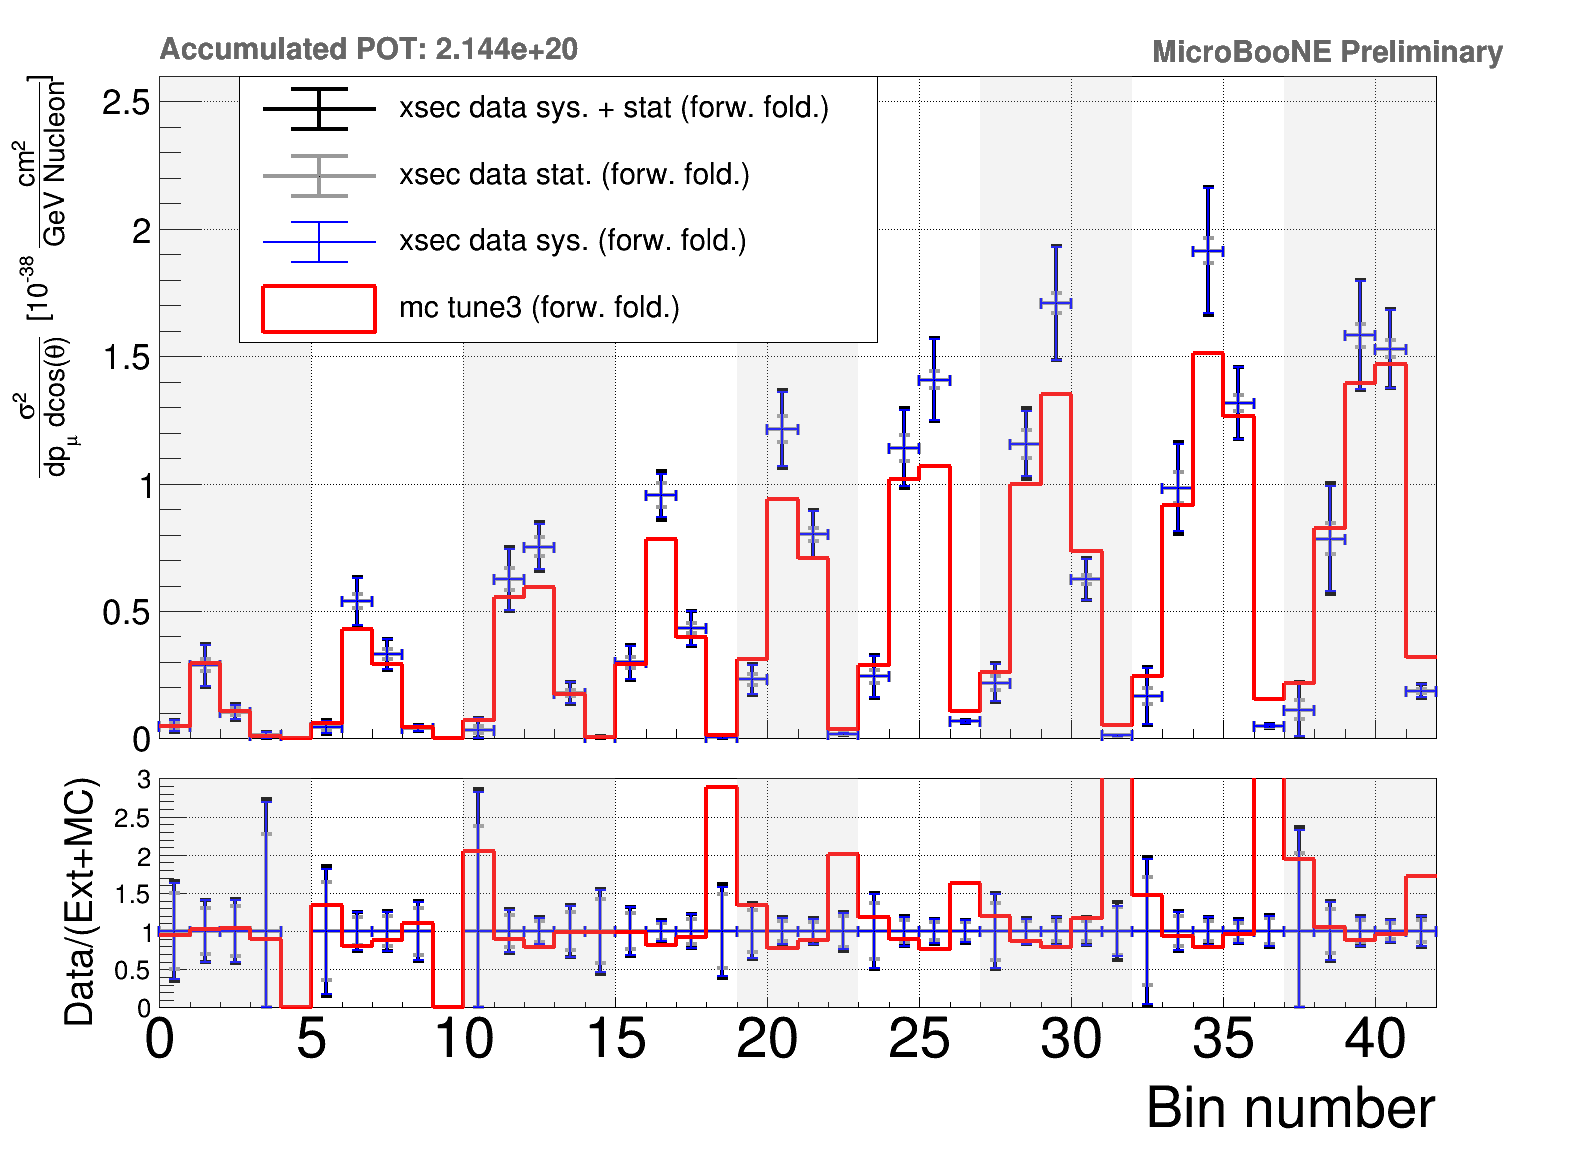

In [27]:
ROOT.gStyle.SetOptTitle(0)

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

xsec_data_this = xsec_data.Clone()
xsec_data_this.SetXTitle("Bin number")
xsec_data_this.SetYTitle('#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]')
    
xsec_data_this.GetYaxis().SetTitleSize(0.04)
xsec_data_this.GetYaxis().SetTitleOffset(0.0)
xsec_data_this.GetYaxis().SetLabelSize(0.05)
xsec_data_this.GetXaxis().SetTitleSize(0.05)
xsec_data_this.GetXaxis().SetLabelSize(0.05)
xsec_data_this.GetXaxis().SetTitleOffset(1)
xsec_data_this.SetLineColor(ROOT.kBlack)
xsec_data_this.SetLineWidth(4)
xsec_data_this.SetMinimum(0)
xsec_data_this.SetMaximum(2.6)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_bin_bkg = xsec_data.Clone()
bin_counter = 0
for t_bin in range(len_theta): #len_theta
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bin_bkg.SetBinContent(bin_counter,0)
            if t_bin%2==0:
                h_bin_bkg.SetBinContent(bin_counter,1000)
h_bin_bkg.SetLineWidth(0)
h_bin_bkg.SetFillColorAlpha(ROOT.kGray,0.2)

xsec_signal.SetLineWidth(4)
xsec_signal.SetLineColor(ROOT.kRed)

xsec_stat = xsec_data_this.Clone()
xsec_sys = xsec_data_this.Clone()
bin_counter = 0
for t_bin in range(len_theta): #len_theta
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            xsec_stat.SetBinError(bin_counter,h_stat[t_bin].GetBinError(m_bin+1))
            xsec_sys.SetBinError(bin_counter,math.sqrt(math.pow(xsec_sys.GetBinError(bin_counter),2) - \
                                                       math.pow(h_stat[t_bin].GetBinError(m_bin+1),2)))

xsec_stat.SetLineColor(ROOT.kGray+1)
xsec_stat.SetLineWidth(4)

xsec_sys.SetLineColor(ROOT.kBlue)
xsec_sys.SetLineWidth(2)

xsec_data_this.Draw('E1')
xsec_stat.Draw('same E1')
xsec_sys.Draw('same E1')
xsec_signal.Draw('same hist')
h_bin_bkg.Draw('same hist')

legend = ROOT.TLegend(0.15,0.55,0.55,0.9); #LEGEND RIGHT
#legend.SetNColumns(2)
legend.AddEntry(xsec_data_this,'xsec data sys. + stat (forw. fold.)',"lep")
legend.AddEntry(xsec_stat,'xsec data stat. (forw. fold.)',"lep")
legend.AddEntry(xsec_sys,'xsec data sys. (forw. fold.)',"lep")
legend.AddEntry(xsec_signal,'mc tune3 (forw. fold.)',"f") #+'/{:04.2f})'.format(chi2_mc/6)
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()

xsec_data_this.GetXaxis().SetLabelOffset(999);
xsec_data_this.GetXaxis().SetTitleOffset(999);
xsec_data_this.GetXaxis().SetLabelSize(0);
xsec_data_this.GetXaxis().SetTitleSize(0);

c1.cd()
xsec_data_this.GetXaxis().SetLabelOffset(0);
xsec_data_this.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

h_xsec_data_ratio = xsec_data_this.Clone()
h_xsec_data_ratio.Divide(xsec_data_this)
h_xsec_stat_ratio = xsec_stat.Clone()
h_xsec_stat_ratio.Divide(xsec_data_this)
h_xsec_sys_ratio = xsec_sys.Clone()
h_xsec_sys_ratio.Divide(xsec_data_this)
h_mc_ratio = xsec_signal.Clone()
h_mc_ratio.Divide(xsec_data_this)

h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)

h_xsec_data_ratio.SetMaximum(-1111)
h_xsec_data_ratio.Draw('E1')
h_xsec_stat_ratio.Draw('E1 same')
h_xsec_sys_ratio.Draw('same E1')
h_mc_ratio.Draw('hist same')
h_bin_bkg.Draw('hist same')


c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_ratio_stat_sys.png")
c1.SaveAs(outputdir_root + "h_xsec_ratio_stat_sys.root")
c1.SaveAs(outputdir_pdf + "h_xsec_ratio_stat_sys.pdf")

#ROOT.gStyle.SetOptTitle(1)


In [28]:
path_result = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
#path_cv = '/home/tmettler/Desktop/weighted/xsec_phasespacerestriction/'
f_result = ROOT.TFile.Open(path_result+"xsec_2D_result.root", 'recreate')
xsec_data.Write('xsec_data')
h_covariance_tot.Write('covariance_matrix')
smearing_matrix.Write('smearing_matrix')
RootFile.Close()
f_result.Close()

In [29]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_sys_only0.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_sys_only0.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_sys_only1.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_sys_only1.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_sys_only2.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_sys_only2.pdf has been 

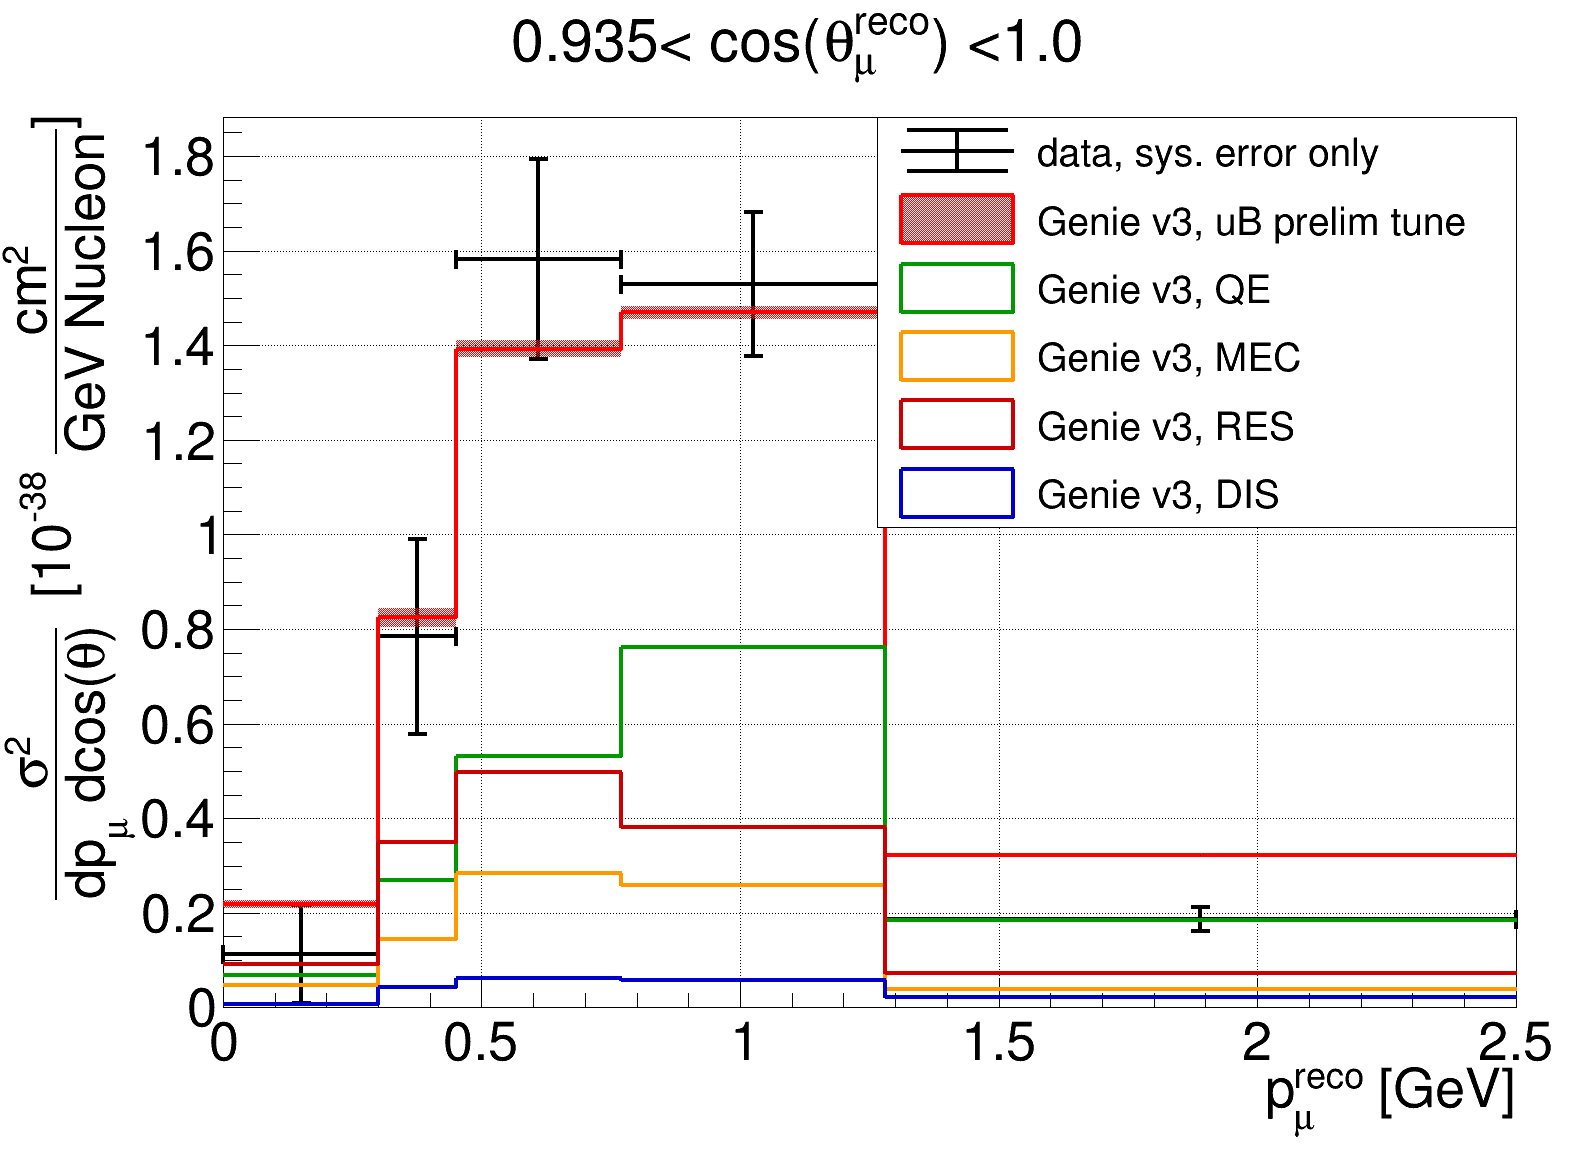

In [30]:
#all systematics
ROOT.gStyle.SetOptTitle(1)
bin_counter = 0
for t_bin in range(len_theta): #len_theta
    legend = ROOT.TLegend(0.55,0.55,0.95,0.9)
    h_xsec_signal[t_bin].SetLineColor(2)
    legend.AddEntry(h_xsec_data[t_bin],'data, sys. error only',"lep");
    legend.AddEntry(h_xsec_signal[t_bin],'Genie v3, uB prelim tune',"f"); 
    legend.AddEntry(h_xsec_QE[t_bin],'Genie v3, QE',"f");
    legend.AddEntry(h_xsec_MEC[t_bin],'Genie v3, MEC',"f");
    legend.AddEntry(h_xsec_RES[t_bin],'Genie v3, RES',"f");
    legend.AddEntry(h_xsec_DIS[t_bin],'Genie v3, DIS',"f");
    #legend.AddEntry(h_xsec_MC_noTune,'Genie v3',"f");
    #legend.AddEntry(h_xsec_MC_noTune,'Genie v3',"f");
    c1.SetRightMargin(0.05)
    ROOT.gStyle.SetEndErrorSize(9)

    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_xsec_data[t_bin].SetBinError(m_bin+1,math.sqrt(h_covariance_tot.GetBinContent(bin_counter,bin_counter)-math.pow(h_stat[t_bin].GetBinError(m_bin+1),2)))

    h_xsec_data[t_bin].SetLineWidth(4)
    h_xsec_data[t_bin].Draw('E1')
    h_xsec_signal[t_bin].SetFillColor(0)
    h_xsec_signal[t_bin].SetLineWidth(4)
    #h_overlay_sig.Draw('hist same')
    h_xsec_signal[t_bin].DrawCopy('Hist same')
    h_xsec_signal[t_bin].SetFillColor(2)
    h_xsec_signal[t_bin].SetFillStyle(3001)
    h_xsec_signal[t_bin].Draw('E2 same')
    
    h_xsec_QE[t_bin].Draw('same hist')
    h_xsec_MEC[t_bin].Draw('same hist')
    h_xsec_RES[t_bin].Draw('same hist')
    h_xsec_DIS[t_bin].Draw('same hist')
    #h_stat[t_bin].SetLineColor(ROOT.kGray+2)
    #h_stat[t_bin].Draw('E1 same')
    legend.Draw()
    #prelim, pot_tex = draw_adding()
    #prelim.Draw()
    #pot_tex.Draw()
    c1.Draw()
    c1.SaveAs(outputdir_png + 'h_xsec_sys_only'+str(t_bin)+'.png')
    #c1.SaveAs(outputdir_root + 'h_xsec_sys_only'+str(t_bin)+'.root')
    c1.SaveAs(outputdir_pdf + 'h_xsec_sys_only'+str(t_bin)+'.pdf')


In [31]:
'''path_result = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_filesV4/'
#path_cv = '/home/tmettler/Desktop/weighted/xsec_phasespacerestriction/'
f_result = ROOT.TFile.Open(path_result+"xsec_momentum_result.root", 'recreate')
h_xsec_data.Write('xsec_data')
h_xsec_MC.Write('xsec_mc')
h_xsec_MC_noTune.Write('xsec_mc_noTune')
h_covariance_tot.Scale(1e38*1e38)
h_covariance_tot.Write('covariance_matrix')
h_smearing_matrix.Write('smearing_matrix')
RootFile.Close()
f_result.Close()'''

'path_result = \'/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_filesV4/\'\n#path_cv = \'/home/tmettler/Desktop/weighted/xsec_phasespacerestriction/\'\nf_result = ROOT.TFile.Open(path_result+"xsec_momentum_result.root", \'recreate\')\nh_xsec_data.Write(\'xsec_data\')\nh_xsec_MC.Write(\'xsec_mc\')\nh_xsec_MC_noTune.Write(\'xsec_mc_noTune\')\nh_covariance_tot.Scale(1e38*1e38)\nh_covariance_tot.Write(\'covariance_matrix\')\nh_smearing_matrix.Write(\'smearing_matrix\')\nRootFile.Close()\nf_result.Close()'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_sys_only0.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_sys_only0.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_sys_only1.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_sys_only1.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_f

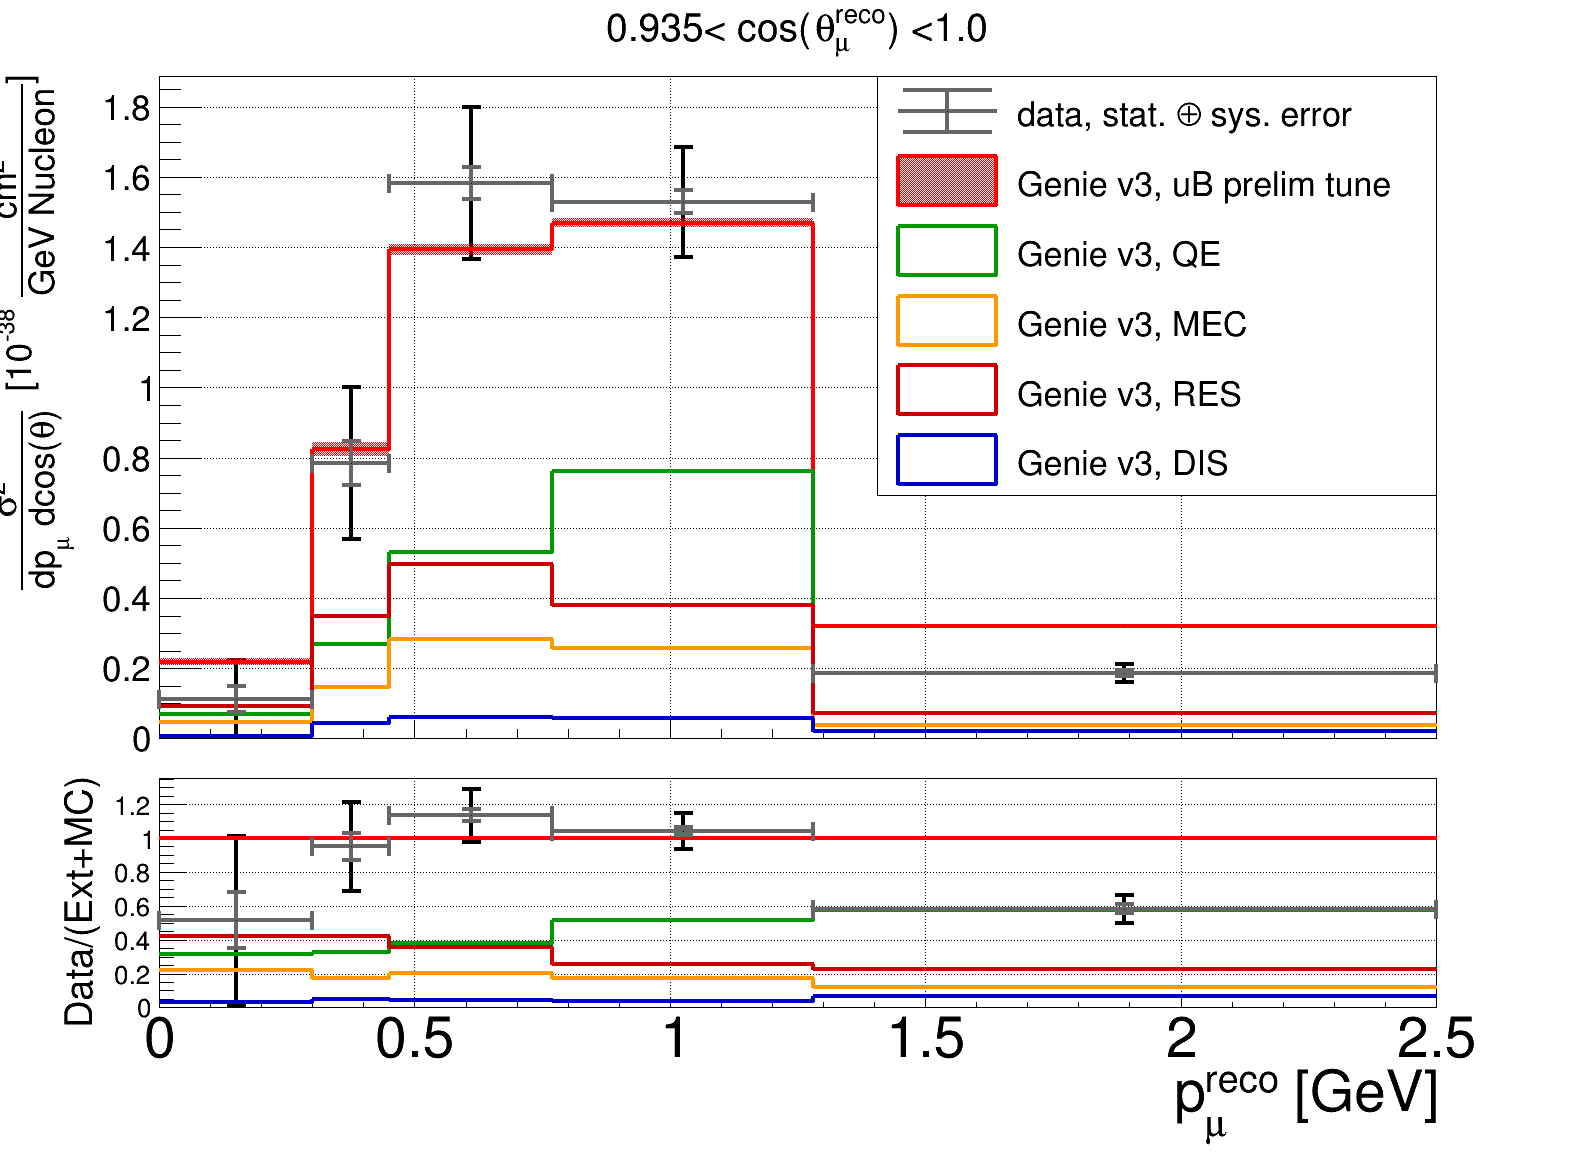

In [32]:
#all systematics
ROOT.gStyle.SetOptTitle(1)
bin_counter = 0
for t_bin in range(len_theta): #len_theta

    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.05)
    c1.SetBottomMargin(0.1)

    c1.cd()
    pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
    pad1.SetGrid(1)
    pad1.Draw()
    pad1.cd()
    pad1.SetBottomMargin(0.03);
    pad1.SetTopMargin(0.1)
    #all systematics
    legend = ROOT.TLegend(0.55,0.35,0.9,0.9)
    h_xsec_signal[t_bin].SetLineColor(2)
    legend.AddEntry(h_stat[t_bin],'data, stat. #oplus sys. error',"lep");
    legend.AddEntry(h_xsec_signal[t_bin],'Genie v3, uB prelim tune',"f");
    legend.AddEntry(h_xsec_QE[t_bin],'Genie v3, QE',"f");
    legend.AddEntry(h_xsec_MEC[t_bin],'Genie v3, MEC',"f");
    legend.AddEntry(h_xsec_RES[t_bin],'Genie v3, RES',"f");
    legend.AddEntry(h_xsec_DIS[t_bin],'Genie v3, DIS',"f");
    #legend.AddEntry(h_xsec_MC_noTune,'Genie v3',"f");


    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_xsec_data[t_bin].SetBinError(m_bin+1,math.sqrt(h_covariance_tot.GetBinContent(bin_counter,bin_counter)))

    h_xsec_data[t_bin].SetLineWidth(4)
    h_xsec_data[t_bin].Draw('E1')
    h_xsec_signal[t_bin].SetFillColor(0)
    h_xsec_signal[t_bin].SetLineWidth(4)
    #h_overlay_sig.Draw('hist same')
    h_xsec_signal[t_bin].DrawCopy('Hist same')
    h_xsec_signal[t_bin].SetFillColor(2)
    h_xsec_signal[t_bin].SetFillStyle(3001)
    h_xsec_signal[t_bin].Draw('E2 same')
    
    h_xsec_QE[t_bin].Draw('same hist')
    h_xsec_MEC[t_bin].Draw('same hist')
    h_xsec_RES[t_bin].Draw('same hist')
    h_xsec_DIS[t_bin].Draw('same hist')
    h_stat[t_bin].SetLineColor(ROOT.kGray+2)
    h_stat[t_bin].Draw('E1 same')
    legend.Draw()
    
    h_xsec_data[t_bin].GetXaxis().SetLabelOffset(999);
    h_xsec_data[t_bin].GetXaxis().SetTitleOffset(999);
    h_xsec_data[t_bin].GetXaxis().SetLabelSize(0);
    h_xsec_data[t_bin].GetXaxis().SetTitleSize(0);

    c1.cd()

    h_xsec_data[t_bin].GetXaxis().SetLabelOffset(0);
    h_xsec_data[t_bin].GetXaxis().SetTitleOffset(0);

    pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
    pad2.SetGrid(1)
    pad2.SetTopMargin(0.04)
    pad2.SetBottomMargin(0.4)
    pad2.Draw()
    pad2.cd()
    
    h_xsec_data_ratio = h_xsec_data[t_bin].Clone()
    h_xsec_data_ratio.Divide(h_xsec_signal[t_bin])
    h_xsec_stat_ratio = h_stat[t_bin].Clone()
    h_xsec_stat_ratio.Divide(h_xsec_signal[t_bin])
    h_mc_ratio = h_xsec_signal[t_bin].Clone()
    h_mc_ratio.Divide(h_xsec_signal[t_bin])
    
    h_QE_ratio = h_xsec_QE[t_bin].Clone()
    h_QE_ratio.Divide(h_xsec_signal[t_bin])
    h_MEC_ratio = h_xsec_MEC[t_bin].Clone()
    h_MEC_ratio.Divide(h_xsec_signal[t_bin])
    h_RES_ratio = h_xsec_RES[t_bin].Clone()
    h_RES_ratio.Divide(h_xsec_signal[t_bin])
    h_DIS_ratio = h_xsec_DIS[t_bin].Clone()
    h_DIS_ratio.Divide(h_xsec_signal[t_bin])

    h_mc_ratio.SetFillColor(0)
    h_xsec_data_ratio.SetTitle(' ')
    h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
    h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
    h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
    h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
    h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
    h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
    h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)

    h_xsec_data_ratio.Draw('E1')
    h_mc_ratio.Draw('hist same')
    h_QE_ratio.Draw('hist same')
    h_MEC_ratio.Draw('hist same')
    h_RES_ratio.Draw('hist same')
    h_DIS_ratio.Draw('hist same')
    h_xsec_stat_ratio.Draw('E1 same')

    
    
    #prelim, pot_tex = draw_adding()
    #prelim.Draw()
    #pot_tex.Draw()
    c1.Draw()
    c1.SaveAs(outputdir_png + 'h_xsec_sys_only'+str(t_bin)+'.png')
    #c1.SaveAs(outputdir_root + 'h_xsec_sys_only'+str(t_bin)+'.root')
    c1.SaveAs(outputdir_pdf + 'h_xsec_sys_only'+str(t_bin)+'.pdf')


In [33]:
#make plots with results of MCC8

In [34]:
#8.004594109042256e-39+/-3.0460599676519193e-40
#77.688966401997492e-39+/-6.235944628026827e-41 # full Run3

In [35]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_MCC8_comparison.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/root/h_xsec_MCC8_comparison.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_MCC8_comparison.pdf has been created


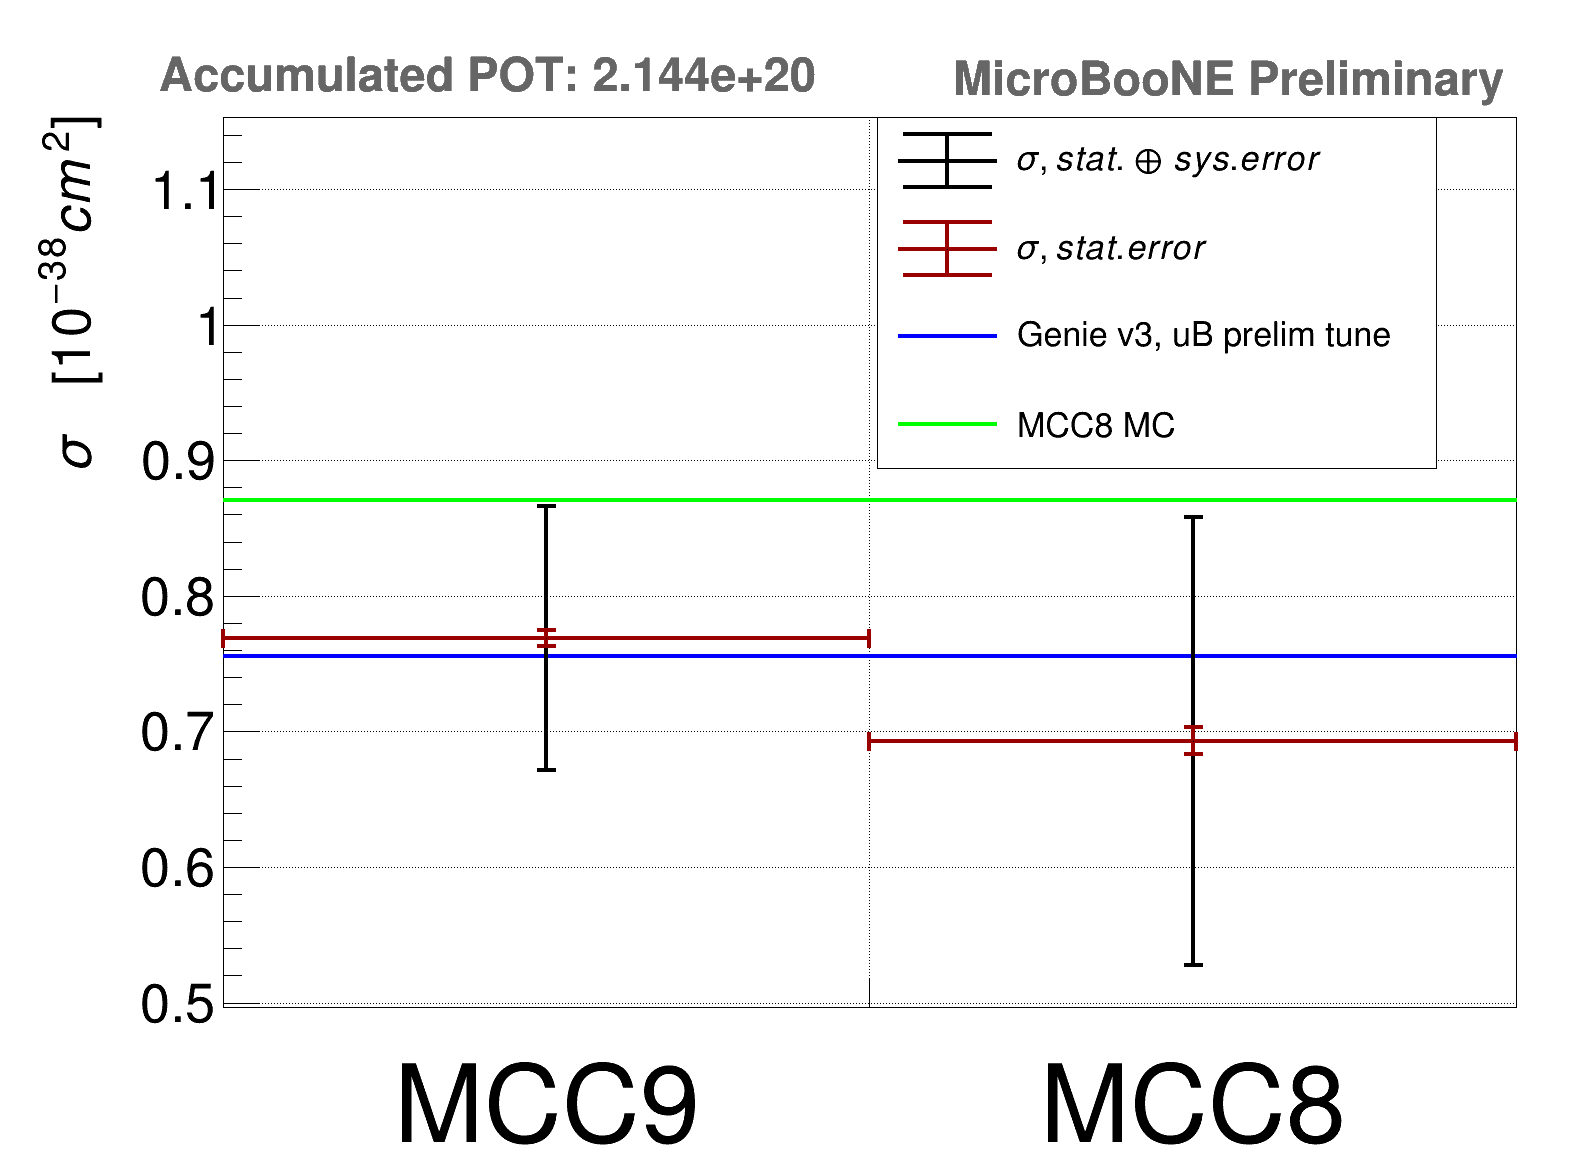

In [36]:
h_tot_xsec = ROOT.TH1F('h_tot_xsec','h_tot_xsec',2,0,1)
c1.SetRightMargin(0.05)
xsec_mcc9 = 7.688966401997492e-39*1e38
stat_err_9 = 6.235944628026827e-41*1e38
sys_err_9_frac = 0.1268#0.1166#0.1490434 # 0.1166
sys_err_9 = xsec_mcc9*sys_err_9_frac


xsec_mcc8 = 0.693e-38*1e38
stat_err_8 = 0.010e-38*1e38
sys_err_8 = 0.165e-38*1e38
h_tot_xsec.SetBinContent(1,xsec_mcc9)
h_tot_xsec.SetBinError(1,math.sqrt(stat_err_9*stat_err_9+sys_err_9*sys_err_9) )
h_tot_xsec.SetBinContent(2,xsec_mcc8)
h_tot_xsec.SetBinError(2,math.sqrt(stat_err_8*stat_err_8+sys_err_8*sys_err_8) )
h_tot_xsec.SetLineColor(ROOT.kBlack), h_tot_xsec.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
h_tot_xsec_stat = h_tot_xsec.Clone()
h_tot_xsec_stat.SetBinError(1,stat_err_9 )
h_tot_xsec_stat.SetBinError(2,stat_err_8 )
h_tot_xsec_stat.SetLineColor(ROOT.kRed+2)

h_tot_xsec_sys = h_tot_xsec.Clone()
h_tot_xsec_sys.SetBinError(1,sys_err_9 )
h_tot_xsec_sys.SetBinError(2,sys_err_8 )
h_tot_xsec_sys.SetLineColor(ROOT.kBlue+2)

h_tot_MC = ROOT.TH1F('h_tot_MC','h_tot_MC',2,0,1)
xsec_MC_9 = 0.755516692203#0.801
xsec_MC_8 = 0.871
h_tot_MC.SetBinContent(1,xsec_MC_9)
h_tot_MC.SetBinContent(2,xsec_MC_9)
h_tot_MC_8 = ROOT.TH1F('h_tot_MC_8','h_tot_MC_8',2,0,1)
h_tot_MC_8.SetBinContent(1,xsec_MC_8)
h_tot_MC_8.SetBinContent(2,xsec_MC_8)

h_tot_MC.SetLineColor(ROOT.kBlue)
h_tot_MC.SetLineWidth(4)
h_tot_MC_8.SetLineColor(ROOT.kGreen)
h_tot_MC_8.SetLineWidth(4)

h_tot_xsec.SetMaximum(h_tot_xsec.GetMaximum()*1.5)

legend = ROOT.TLegend(0.55,0.6,0.9,0.9) # LEGEND LEFT
legend.AddEntry(h_tot_xsec,"\sigma, stat. \oplus sys. error","lep");
legend.AddEntry(h_tot_xsec_stat,"\sigma, stat. error","lep");
legend.AddEntry(h_tot_MC,"Genie v3, uB prelim tune","l");
legend.AddEntry(h_tot_MC_8,"MCC8 MC","l");

h_tot_xsec.GetYaxis().SetTitleSize(0.05)
h_tot_xsec.GetYaxis().SetTitleOffset(0.0)
h_tot_xsec.GetYaxis().SetLabelSize(0.05)

h_tot_xsec.GetXaxis().SetTitleSize(0.15)
h_tot_xsec.GetXaxis().SetLabelSize(0.15)
h_tot_xsec.GetXaxis().SetTitleOffset(-999)
h_tot_xsec.GetXaxis().SetLabelOffset(0.02)
h_tot_xsec.GetXaxis().SetLabelSize(0.15)
h_tot_xsec.SetYTitle("\sigma  \t [10^{-38} cm^{2}]")
h_tot_xsec.GetXaxis().SetBinLabel(1, 'MCC9')
h_tot_xsec.GetXaxis().SetBinLabel(2, 'MCC8')
h_tot_xsec.Draw('E1')
#h_tot_xsec_sys.Draw('E1 same')
h_tot_MC.Draw('hist same')
h_tot_MC_8.Draw('hist same')
h_tot_xsec.Draw('E1 same')
h_tot_xsec_stat.Draw('E1 same')

legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_MCC8_comparison.png")
c1.SaveAs(outputdir_root + "h_xsec_MCC8_comparison.root")
c1.SaveAs(outputdir_pdf + "h_xsec_MCC8_comparison.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: h_tot_xsec (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_tot_xsec (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_tot_xsec (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_tot_MC (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_tot_MC_8 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/png/h_xsec_MCC8_comparison_pub.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/root/h_xsec_MCC8_comparison_pub.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_result_2D_fullRun3/pdf/h_xsec_MCC8_comparison_pub.pdf has been created


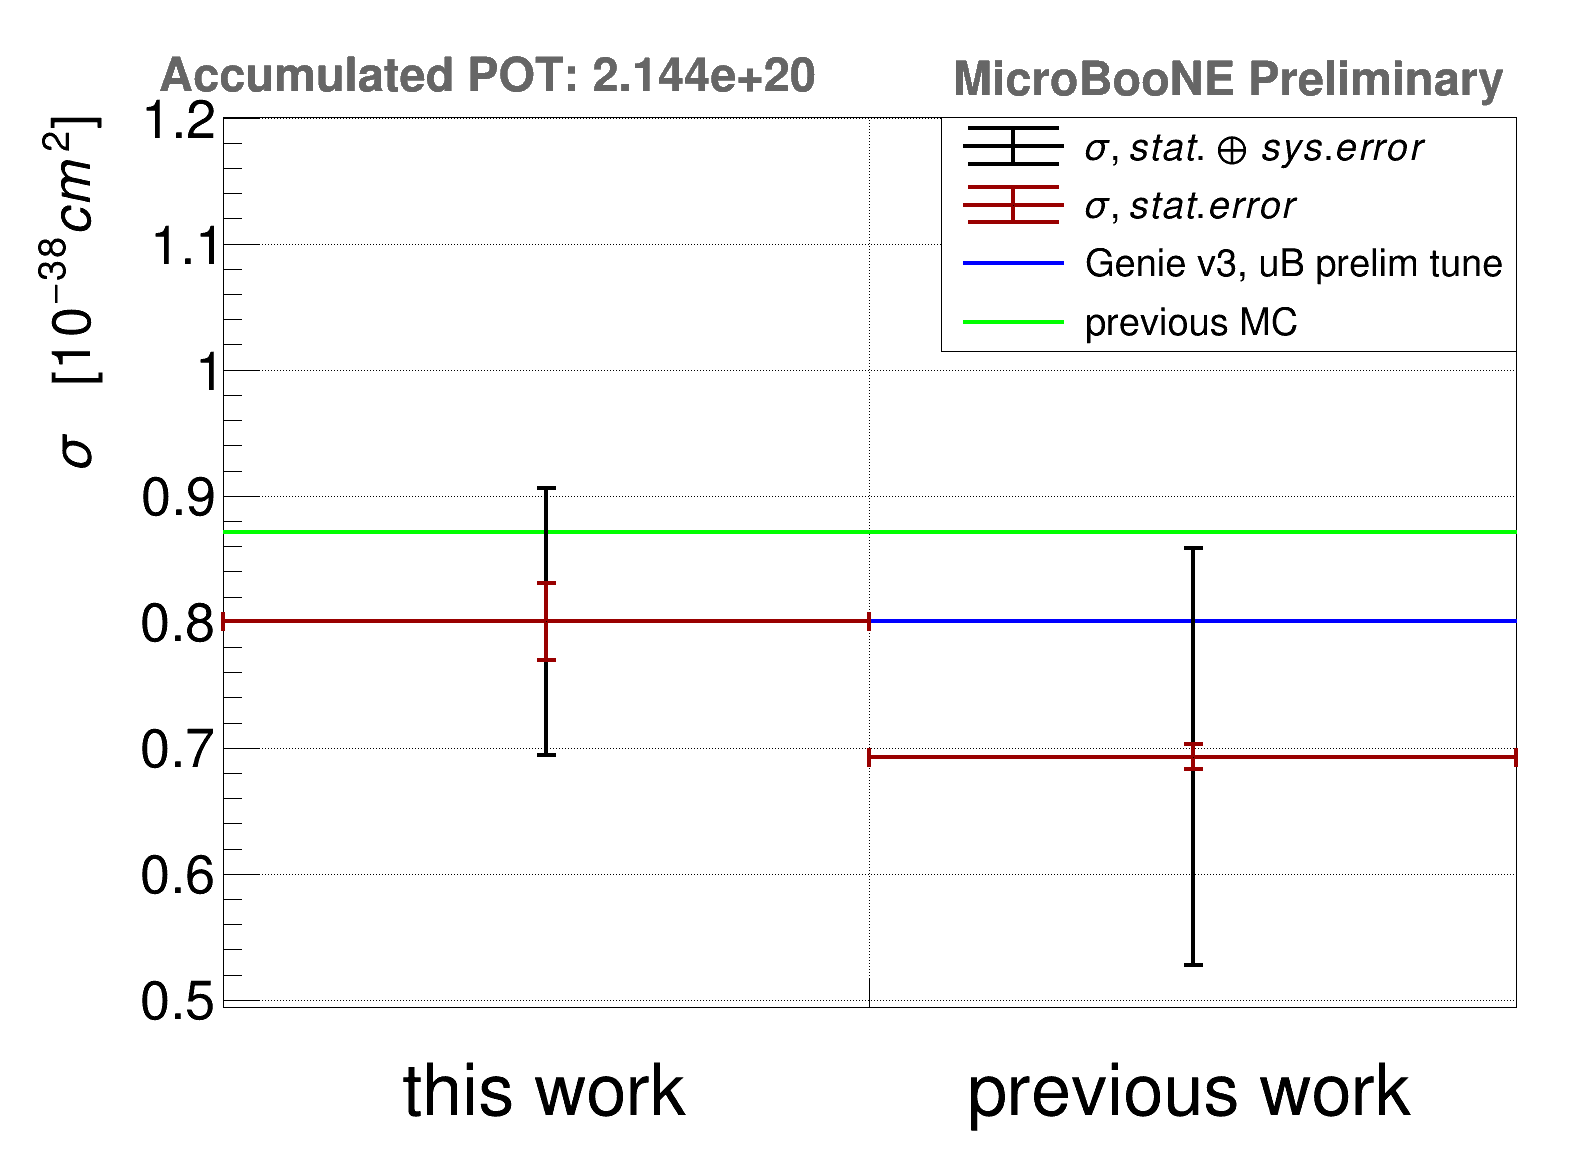

In [37]:
h_tot_xsec = ROOT.TH1F('h_tot_xsec','h_tot_xsec',2,0,1)
c1.SetRightMargin(0.05)
xsec_mcc9 = 8.004594109042256e-39*1e38
stat_err_9 = 3.0460599676519193e-40*1e38
sys_err_9_frac = 0.1268 #0.1490434 # 0.1166
sys_err_9 = xsec_mcc9*sys_err_9_frac


xsec_mcc8 = 0.693e-38*1e38
stat_err_8 = 0.010e-38*1e38
sys_err_8 = 0.165e-38*1e38
h_tot_xsec.SetBinContent(1,xsec_mcc9)
h_tot_xsec.SetBinError(1,math.sqrt(stat_err_9*stat_err_9+sys_err_9*sys_err_9) )
h_tot_xsec.SetBinContent(2,xsec_mcc8)
h_tot_xsec.SetBinError(2,math.sqrt(stat_err_8*stat_err_8+sys_err_8*sys_err_8) )
h_tot_xsec.SetLineColor(ROOT.kBlack), h_tot_xsec.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
h_tot_xsec_stat = h_tot_xsec.Clone()
h_tot_xsec_stat.SetBinError(1,stat_err_9 )
h_tot_xsec_stat.SetBinError(2,stat_err_8 )
h_tot_xsec_stat.SetLineColor(ROOT.kRed+2)

h_tot_xsec_sys = h_tot_xsec.Clone()
h_tot_xsec_sys.SetBinError(1,sys_err_9 )
h_tot_xsec_sys.SetBinError(2,sys_err_8 )
h_tot_xsec_sys.SetLineColor(ROOT.kBlue+2)

h_tot_MC = ROOT.TH1F('h_tot_MC','h_tot_MC',2,0,1)
xsec_MC_9 = 0.801
xsec_MC_8 = 0.871
h_tot_MC.SetBinContent(1,xsec_MC_9)
h_tot_MC.SetBinContent(2,xsec_MC_9)
h_tot_MC_8 = ROOT.TH1F('h_tot_MC_8','h_tot_MC_8',2,0,1)
h_tot_MC_8.SetBinContent(1,xsec_MC_8)
h_tot_MC_8.SetBinContent(2,xsec_MC_8)

h_tot_MC.SetLineColor(ROOT.kBlue)
h_tot_MC.SetLineWidth(4)
h_tot_MC_8.SetLineColor(ROOT.kGreen)
h_tot_MC_8.SetLineWidth(4)

h_tot_xsec.SetMaximum(h_tot_xsec.GetMaximum()*1.5)

legend = ROOT.TLegend(0.59,0.7,0.95,0.9) # LEGEND LEFT
legend.AddEntry(h_tot_xsec,"\sigma, stat. \oplus sys. error","lep");
legend.AddEntry(h_tot_xsec_stat,"\sigma, stat. error","lep");
legend.AddEntry(h_tot_MC,"Genie v3, uB prelim tune","l");
legend.AddEntry(h_tot_MC_8,"previous MC","l");

h_tot_xsec.GetYaxis().SetTitleSize(0.05)
h_tot_xsec.GetYaxis().SetTitleOffset(0.0)
h_tot_xsec.GetYaxis().SetLabelSize(0.05)

h_tot_xsec.GetXaxis().SetTitleSize(0.15)
h_tot_xsec.GetXaxis().SetLabelSize(0.15)
h_tot_xsec.GetXaxis().SetTitleOffset(-999)
h_tot_xsec.GetXaxis().SetLabelOffset(0.02)
h_tot_xsec.GetXaxis().SetLabelSize(0.1)
h_tot_xsec.SetYTitle("\sigma  \t [10^{-38} cm^{2}]")
h_tot_xsec.GetXaxis().SetBinLabel(1, 'this work')
h_tot_xsec.GetXaxis().SetBinLabel(2, 'previous work')
h_tot_xsec.Draw('E1')
#h_tot_xsec_sys.Draw('E1 same')
h_tot_MC.Draw('hist same')
h_tot_MC_8.Draw('hist same')
h_tot_xsec.Draw('E1 same')
h_tot_xsec_stat.Draw('E1 same')

legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_MCC8_comparison_pub.png")
c1.SaveAs(outputdir_root + "h_xsec_MCC8_comparison_pub.root")
c1.SaveAs(outputdir_pdf + "h_xsec_MCC8_comparison_pub.pdf")